In [232]:
import pandas as pd
from scipy.stats import binom_test, fisher_exact
from genepy.utils import helper as h 
from genepy.utils import plot
from genepy.imaging import fish
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import fisher_exact, chi2_contingency, ttest_ind
from scipy.spatial import distance_matrix
import numpy as np

%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## Processing the data

In [2]:
project='FishSuperResColoc'
version='v2'

In [3]:
rename = {
"Text Between Delimiters":"subset",
"Folder Short":"folder_short",
"Folder Path":"folder",
"Source.Name":"name",
"ImageDocumentName::Image Name":"image",
"ParentID::ID of the parent!!I":"parent_id",
"ID::ID!!I":"id",
"RegionsCount::Count!!I": "count",
"ImageSceneName::Image Scene Name ":"scene",
"Area1::Area Unscaled!!R":"area_u",
"Area::Area!!R": "area",
"CenterX1::Center X Unscaled!!R":"x",
"CenterY1::Center Y Unscaled!!R":"y",
"ImageScaleX::Image Scale X!!R":"scale_x",
"ImageScaleY::Image Scale Y!!R":"scale_y",
"ImageIndexZ::Image Index Z!!I":"z",
'Classes 5 RegionsCount ::Classes 5 Count!!I':"count_red",
'Classes 9 RegionsCount ::Classes 9 Count!!I':"count_green",
"ClassColorName::Region Class Color Name": "class",
"IntensityMaximum_TV1-T1-SR::Intensity Maximum of channel 'TV1-T1-SR'!!R":"max_red",
"IntensityMaximum_TV2-T1-SR::Intensity Maximum of channel 'TV2-T1-SR'!!R":"max_tv2_t1",
"IntensityMaximum_TV2-T2-SR::Intensity Maximum of channel 'TV2-T2-SR'!!R":"max_green",
"IntensityMaximum_TV2-T3-SR::Intensity Maximum of channel 'TV2-T3-SR'!!R":"max_dapi",
"IntensityMean_TV1-T1-SR::Intensity Mean Value of channel 'TV1-T1-SR'!!R":"mean_red",
"IntensityMean_TV2-T1-SR::Intensity Mean Value of channel 'TV2-T1-SR'!!R":"mean_tv2_t1",
"IntensityMean_TV2-T2-SR::Intensity Mean Value of channel 'TV2-T2-SR'!!R":"mean_green",
"IntensityMean_TV2-T3-SR::Intensity Mean Value of channel 'TV2-T3-SR'!!R":"mean_dapi",
"IntensityMinimum_TV1-T1-SR::Intensity Minimum of channel 'TV1-T1-SR'!!R":"min_red",
"IntensityMinimum_TV2-T1-SR::Intensity Minimum of channel 'TV2-T1-SR'!!R":"min_tv2_t1",
"IntensityMinimum_TV2-T2-SR::Intensity Minimum of channel 'TV2-T2-SR'!!R":"min_green",
"IntensityMinimum_TV2-T3-SR::Intensity Minimum of channel 'TV2-T3-SR'!!R":"min_dapi",
"IntensitySum0_TV1-T1-SR::Intensity Pixel Count of channel 'TV1-T1-SR'!!R":"pixsum_red",
"IntensitySum0_TV2-T1-SR::Intensity Pixel Count of channel 'TV2-T1-SR'!!R":"pixsum_tv2_t1",
"IntensitySum0_TV2-T2-SR::Intensity Pixel Count of channel 'TV2-T2-SR'!!R":"pixsum_green",
"IntensitySum0_TV2-T3-SR::Intensity Pixel Count of channel 'TV2-T3-SR'!!R":"pixsum_dapi",
"IntensityRange_TV1-T1-SR::Intensity Range of channel 'TV1-T1-SR'!!R":"range_red",
"IntensityRange_TV2-T1-SR::Intensity Range of channel 'TV2-T1-SR'!!R":"range_tv2_t1",
"IntensityRange_TV2-T2-SR::Intensity Range of channel 'TV2-T2-SR'!!R":"range_green",
"IntensityRange_TV2-T3-SR::Intensity Range of channel 'TV2-T3-SR'!!R":"range_dapi",
"IntensityStd_TV1-T1-SR::Intensity Standard Deviation of channel 'TV1-T1-SR'!!R":"std_red",
"IntensityStd_TV2-T1-SR::Intensity Standard Deviation of channel 'TV2-T1-SR'!!R":"std_tv2_t1",
"IntensityStd_TV2-T2-SR::Intensity Standard Deviation of channel 'TV2-T2-SR'!!R":"std_green",
"IntensityStd_TV2-T3-SR::Intensity Standard Deviation of channel 'TV2-T3-SR'!!R":"std_dapi",
"IntensitySum1_TV1-T1-SR::Intensity Sum of channel 'TV1-T1-SR'!!R":"sum_red",
"IntensitySum1_TV2-T1-SR::Intensity Sum of channel 'TV2-T1-SR'!!R":"sum_tv2_t1",
"IntensitySum1_TV2-T2-SR::Intensity Sum of channel 'TV2-T2-SR'!!R":"sum_green",
"IntensitySum1_TV2-T3-SR::Intensity Sum of channel 'TV2-T3-SR'!!R":"sum_dapi",
"IntensitySum2_TV1-T1-SR::Intensity Sum Squares of channel 'TV1-T1-SR'!!R":"sum2_red",
"IntensitySum2_TV2-T1-SR::Intensity Sum Squares of channel 'TV2-T1-SR'!!R":"sum2_tv2_t1",
"IntensitySum2_TV2-T2-SR::Intensity Sum Squares of channel 'TV2-T2-SR'!!R":"sum2_green",
"IntensitySum2_TV2-T3-SR::Intensity Sum Squares of channel 'TV2-T3-SR'!!R":"sum2_dapi",
"Unnamed: 27":"unknown"
}

In [80]:
data = pd.read_csv('../data/'+project+'/data_query_files/querry.csv').rename(columns=rename)
data

subset                                 folder_short  \
0       Subset10  AAVS1_CRISPR_MED1\AAVS1_CRISPR_MED1 Image7\   
1       Subset10  AAVS1_CRISPR_MED1\AAVS1_CRISPR_MED1 Image7\   
2       Subset10  AAVS1_CRISPR_MED1\AAVS1_CRISPR_MED1 Image7\   
3       Subset10  AAVS1_CRISPR_MED1\AAVS1_CRISPR_MED1 Image7\   
4       Subset10  AAVS1_CRISPR_MED1\AAVS1_CRISPR_MED1 Image7\   
...          ...                                          ...   
117757   Subset9                   IF FISH final\Runx2_excel\   
117758   Subset9                   IF FISH final\Runx2_excel\   
117759   Subset9                   IF FISH final\Runx2_excel\   
117760   Subset9                   IF FISH final\Runx2_excel\   
117761   Subset9                   IF FISH final\Runx2_excel\   

                                                   folder  \
0       C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...   
1       C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...   
2       C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...   
3       C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...   
4       C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...   
...                                                   ...   
117757  C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...   
117758  C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...   
117759  C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...   
117760  C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...   
117761  C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...   

                                                     name  \
0       Image 7_Subset10_Out_Maximum intensity project...   
1       Image 7_Subset10_Out_Maximum intensity project...   
2       Image 7_Subset10_Out_Maximum intensity project...   
3       Image 7_Subset10_Out_Maximum intensity project...   
4       Image 7_Subset10_Out_Maximum intensity project...   
...                                                   ...   
117757  Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...   
117758  Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...   
117759  Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...   
117760  Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...   
117761  Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...   

                                                    image  parent_id    id  \
0                                                     NaN        NaN   NaN   
1       Image 7_Subset10_Out_Maximum intensity project...       14.0  15.0   
2       Image 7_Subset10_Out_Maximum intensity project...       14.0  16.0   
3       Image 7_Subset10_Out_Maximum intensity project...       14.0  17.0   
4       Image 7_Subset10_Out_Maximum intensity project...       14.0  18.0   
...                                                   ...        ...   ...   
117757  Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...        1.0  23.0   
117758  Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...        1.0  24.0   
117759  Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...        1.0  25.0   
117760  Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...        1.0  26.0   
117761  Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...        1.0  27.0   

        scene    area                x  ...   sum_1   sum_2  range_1  range_2  \
0         NaN  pixel²            pixel  ...  pixel²  pixel²  Unknown  Unknown   
1         NaN       7  368.64285714286  ...       7       7     1661     4080   
2         NaN      28  396.21428571429  ...      28      28     8089    13818   
3         NaN      13  426.88461538462  ...      13      13     4583     6576   
4         NaN      29  340.74137931035  ...      29      29     3515    12083   
...       ...     ...              ...  ...     ...     ...      ...      ...   
117757    NaN   55230  1146.4196089082  ...     NaN     NaN      NaN      NaN   
117758    NaN   60384  1546.5754835718  ...     NaN     NaN      NaN      NaN   
117759    NaN   48042  2480.9880521211  ...     NaN     NaN      NaN      NaN   
117760    NaN   

In [87]:
data.columns

Index(['subset', 'folder_short', 'folder', 'name', 'image', 'parent_id', 'id',
       'scene', 'area', 'x', 'y', 'max_1', 'max_2', 'mean_1', 'mean_2',
       'min_1', 'min_2', 'sum_1', 'sum_2', 'range_1', 'range_2', 'std_1',
       'std_2', 'sum1_1', 'sum1_2', 'sum2_1', 'sum2_2'],
      dtype='object')

In [5]:
cat ../data/$project/data_query_files/querry.csv | less

<U+FEFF>Text Between Delimiters,Folder Short,Folder Path,Source.Name,ImageDocumentName::Image Name,ParentID::ID of the parent!!I,ID::ID!!I,ImageSceneName::Image Scene Name ,Area1::Area Unscaled!!R,CenterX1::Center X Unscaled!!R,CenterY1::Center Y Unscaled!!R,IntensityMaximum_TV1-T1-SR::Intensity Maximum of channel 'TV1-T1-SR'!!R,IntensityMaximum_TV2-T1-SR::Intensity Maximum of channel 'TV2-T1-SR'!!R,IntensityMean_TV1-T1-SR::Intensity Mean Value of channel 'TV1-T1-SR'!!R,IntensityMean_TV2-T1-SR::Intensity Mean Value of channel 'TV2-T1-SR'!!R,IntensityMinimum_TV1-T1-SR::Intensity Minimum of channel 'TV1-T1-SR'!!R,IntensityMinimum_TV2-T1-SR::Intensity Minimum of channel 'TV2-T1-SR'!!R,IntensitySum0_TV1-T1-SR::Intensity Pixel Count of channel 'TV1-T1-SR'!!R,IntensitySum0_TV2-T1-SR::Intensity Pixel Count of channel 'TV2-T1-SR'!!R,IntensityRange_TV1-T1-SR::Intensity Range of channel 'TV1-T1-SR'!!R,IntensityRange_TV2-T1-SR::Intensity Range of channel 'TV2-T1-SR'!!R,IntensityStd_TV1-T1-SR::Int

In [ ]:
data.iloc[0].tolist()

In [ ]:
set(data.folder_short)

In [ ]:
cond = {'AAVS1_CRISPR_MED1\\AAVS1_CRISPR_MED1 Image7\\':'AAVS1',
 'IF FISH final\\AAVS1_CRISPR_MEF2D\\':'AAVS1',
 'IF FISH final\\IRF2BP2_excel\\':'',
 'IF FISH final\\MEF2C_excel\\':'',
 'IF FISH final\\MEF2D_CRISPR_MED1\\':'MEF2D',
 'IF FISH final\\MEF2D_CRISPR_MEF2D\\':'MEF2D',
 'IF FISH final\\Runx2_excel\\':''}

In [ ]:
prot = {'AAVS1_CRISPR_MED1\\AAVS1_CRISPR_MED1 Image7\\':'MED1',
 'IF FISH final\\AAVS1_CRISPR_MEF2D\\':'MEF2D',
 'IF FISH final\\IRF2BP2_excel\\':'IRF2BP2',
 'IF FISH final\\MEF2C_excel\\':'MEF2C',
 'IF FISH final\\MEF2D_CRISPR_MED1\\':'MED1',
 'IF FISH final\\MEF2D_CRISPR_MEF2D\\':'MEF2D',
 'IF FISH final\\Runx2_excel\\':'RUNX2'}

In [ ]:
data = data[~data.name.str.contains('Classes')]

In [ ]:
data['condition'] = [cond[i] for i in data.folder_short]

In [ ]:
data['protein'] = [prot[i] for i in data.folder_short]

In [ ]:
data['type'] = [i.split('.')[0].split('_')[-1] for i in data.name]

In [ ]:
data['name'] = [cond[i]+'_'+prot[i] for i in data.folder_short]

In [ ]:
set(data.type)

In [ ]:
data = data[~data.id.isna()]

In [ ]:
set(data.subset)

In [ ]:
data = data.drop(columns=['scene','image','folder','folder_short'])

In [ ]:
data['subset'] = [i.split('Subset')[-1] for i in data.subset]

In [ ]:
for val in ['area','x','y','max_1','max_2','mean_1','mean_2','min_1','min_2','range_1','range_2','std_1','std_2','sum_1','sum_2','sum1_1','sum1_2','sum2_1','sum2_2']:
    data[val]= data[val].astype(float)

In [ ]:
for val in ['subset','parent_id','id']:
    data[val] = data[val].astype('int')

In [ ]:
len(data.id)

# results

## why we are not doing a monte carlo but just a hypthesis testing on a binomial

monte carlo would be useful in our case if we did not know the expected distribution.
given a way to generate our distribution (which specific parameters can be learnt from the data) we might be able to express what would be the null hypothesis by estimating this unknown distribution. it is useful for when we don't know the exact distribution or when it is too complex to analytically solve.  

However in our case we can approximate the distribution well enough by a binomial. It is true that given that the dna will not have the same density everywhere on the nucleus, that the dots will have themselves variable intensity and size, which might express or not a multiplicity of points, the distribution is not a binomial. 

But you said yourself that for all purposes we could simplify these hypothesis. 

I also don't think that we have enough data points to correctly estimate the monte carlo parameters. 

A binomial is thus enough for this analysis

### having specificities in the data needing to be modelled:

I found that the data has specific bias that still need to be taken in account while not needing to change the statistics:

the avg size of a MYC dot is 350 whereas the one of a MYC green is 45

In [ ]:
def desc(data):
    return data.sum()/data.mean(),len(data)
# for each group
res = {}
for val in set(data.name):
    print('\n',val)
    group = data[data.name==val]
    space = group[group.type=='Nucleus'].area.sum()
    totsize = group[group.type==' Green Dots'].area.sum()
                 
    coloc,s_coloc = desc(group[group.type=='MYC  Green'].area)
    outside,s_outside = desc(group[group.type=='MYC'].area)
    print('data: \n  - total nucleuses size: '+str(int(space))+'\n  - total Green dot size: '+str(int(totsize))+'\n  - counts for coloc: '+str(int(s_coloc))+'\n  - counts for not coloc: '+str(int(s_outside))) 
    p_in = totsize/space
    isin = coloc/(outside+coloc)
    res[val] = [s_coloc,s_outside]
    print('proba: (null, obs)',p_in,isin)
    print('nb of datapoints: ',s_coloc+s_outside)
    print('p_value: ',binom_test([s_coloc,s_outside],p=p_in))

from this analysis it seems clear that the colocalization happens less than 50% of the time in any condition but that we have colocalization with MYC for all analyzed proteins compared to random chance, given the data extracted by the algorithm and the assumption we made.

In [ ]:
fisher_exact([res['AAVS1_MED1'], res['MEF2D_MED1']])

In [ ]:
fisher_exact([res['AAVS1_MEF2D'], res['MEF2D_MEF2D']])

we thus have much 1.7 times more colocalization of MEF2D when MEF2D is degraded vs when it is not and 2 times less colocalization of MED1 but p_val of .1

# running new version

## Loading

In [380]:
project='FishSuperResColoc'
version='v4'

In [381]:
csvs = ! ls ../data/$project/Yaser3/*/*.csv
res = pd.DataFrame()
for val in csvs:
    v = pd.read_csv(val,).drop(index=0)
    v['filename'] = '-'.join(val.split('/')[-2].split('-')[2:])
    res = res.append(v)
res = res.rename(columns=rename)
res.parent_id = res.parent_id.astype(int)
res.id = res.id.astype(int)
res.area = res.area.astype(float)
res = res.reset_index(drop=True)

## labelling

In [382]:
unstring =  ['area', 'x', 'y', "z", "scale_x", "scale_y", "count_red", "count_green", "max_red", "max_green", "max_dapi", "mean_red", "mean_green", "mean_dapi", "min_red", "min_green", "min_dapi", "pixsum_red", "pixsum_green", "pixsum_dapi", "range_red", "range_green", "range_dapi", "std_red", "std_green", "std_dapi", "sum_red", "sum_green", "sum_dapi", "sum2_red", "sum2_green", "sum2_dapi"]
zsize = 85 
toint=['parent_id',"id","area","x",'y',"z","count_red","count_green"]
torn = {'Orange':"dapi", 'Fuchsia': "green", "Yellow": 'red'}

In [383]:
res[unstring] = pd.concat([res[i].astype(str).str.replace('  ','0').replace(' ','0').replace('', '0').replace('None',"0").astype(float) for i in unstring], axis=1)

res['x']= res['x']*res["scale_x"]
res['y']= res['y']*res["scale_y"]
res["z"]= res['z']*zsize
res = res.drop(columns=['area_u',"scale_x",'scale_y'])
print(set(res['filename']))

imageinfo = res['image'].str.replace('_Subset.czi', '').str.replace('Subset.czi', '').str.replace('.czi', '').str.replace('Image ', '').str.replace('_SIM_Channel Alignment_P', "--").str.replace('_Out_Channel Alignment_P',"--").str.replace('_P', '--')
res['group'] = res['filename'] + "--" + imageinfo
res['exp'] = ['-'.join(i.split('-')[:2]+i.split('-')[3:]) for i in res.filename]
res['treat'] = [i.split('-')[-2] for i in res.filename]
res['image'] = [i.split('--')[0] for i in imageinfo]
res['part'] = [i.split('--')[-1] for i in imageinfo]
print('number of exp')
print(set(res.exp))



res['class'] = res['class'].replace(torn)
res = res.drop(index=res[res['class'].isna()].index)
res[toint] = res[toint].astype(int)

{'MEF2C-MYC_MEF2D-VHL-G2', 'MEF2D-MYC_MEF2D-DMSO-G1', 'MEF2D-MEF2C-VHL-G2', 'MEF2C-MYC_MEF2D-DMSO-G1', 'MEF2C-MYC_MEF2D-DMSO-G2', 'MEF2D-MEF2C-DMSO-G2', 'MED1-MYC_MEF2D-VHL-G1', 'MEF2D-MEF2C-DMSO-G1', 'MED1-MYC_MEF2D-DMSO-G1', 'MEF2D-MYC_MEF2D-VHL-G1', 'MEF2C-MYC_MEF2D-VHL-G1', 'MEF2D-MEF2C-VHL-G1'}


<ipython-input-383-2b606f9d45d1>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  imageinfo = res['image'].str.replace('_Subset.czi', '').str.replace('Subset.czi', '').str.replace('.czi', '').str.replace('Image ', '').str.replace('_SIM_Channel Alignment_P', "--").str.replace('_Out_Channel Alignment_P',"--").str.replace('_P', '--')


number of exp
{'MEF2D-MYC_MEF2D-G1', 'MEF2D-MEF2C-G2', 'MEF2D-MEF2C-G1', 'MEF2C-MYC_MEF2D-G1', 'MEF2C-MYC_MEF2D-G2', 'MED1-MYC_MEF2D-G1'}


In [384]:
set(res.exp)

{'MED1-MYC_MEF2D-G1',
 'MEF2C-MYC_MEF2D-G1',
 'MEF2C-MYC_MEF2D-G2',
 'MEF2D-MEF2C-G1',
 'MEF2D-MEF2C-G2',
 'MEF2D-MYC_MEF2D-G1'}

In [385]:
res.to_csv('../results/'+project+"/"+version+"_all.csv")

In [356]:
res = pd.read_csv('../results/'+project+"/"+version+"_all.csv", index_col=0)

## colocallizing

In [13]:
#mkdir ../results/FishSuperResColoc

In [250]:
workon = ['MEF2C-MYC_MEF2D-G2', 'MEF2D-MEF2C-G2']
res = res[res.exp.isin(workon)]

In [386]:
call_scale = 1.2

mincellzstack = 20
minredzstack = 3
mingreenzstack = 2

minsumred = 10**6

In [387]:
cells = res[res["parent_id"]==1].copy()
dots = res[res["parent_id"]!=1].copy()
cells[['count_red','count_green']].mean()

todrop=["parent_id", "id", 'count_red', 'count_green', "filename"]
groupdefault={
    "image": "first",
    "z": ["mean", "min", "max"],
    'area': ["sum", "min", "max"],
    "class": "unique",
    "group" : "first",
    "exp" : "first",
    "treat" : "first",
    "part" : "first",
    "mean_red" : ["mean", "var"],
    "mean_green" : ["mean", "var"],
    "mean_dapi" :["mean", "var"],
    "pixsum_red" : "sum",
    "pixsum_green" : "sum",
    "pixsum_dapi" : "sum",
    "sum_red" : "sum",
    "sum_green" : "sum",
    "sum_dapi" : "sum",
}

nofilter = ['MEF2D-MEF2C-G1','MEF2D-MEF2C-G2']

### coloc red

In [388]:
ared = fish.colocalize(dots[dots['class']=='red'], distance_scale=call_scale)
mred = fish.mergeAnnotated(ared, groupdefault=groupdefault, todrop=todrop)

#filtering 
torm = []
for val in set(mred[~mred.exp.isin(nofilter)].group):
    torm.extend(mred[mred.group==val].sort_values(by='sum_red_sum').index.tolist()[3:])
    torm.extend(mred[(mred.group==val) & ((mred['counts_']<minredzstack)|(mred.sum_red_sum<minsumred))])
mred = mred[~mred.index.isin(torm)]

# applying filtered red to dots:
dots = dots[~dots.index.isin(ared[~ared.m_id.isin(mred.index.tolist())].index.tolist())]
ared = ared[ared.m_id.isin(mred.index.tolist())]

MEF2D-MEF2C-DMSO-G2--40--2-4


/home/jeremie/genepy/genepy/imaging/fish.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdot[mergedidcol]=None
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


MED1-MYC_MEF2D-VHL-G1--11--10-1-1
MEF2D-MYC_MEF2D-DMSO-G1--4--7-2
MEF2C-MYC_MEF2D-VHL-G2--19--6-3
MEF2C-MYC_MEF2D-VHL-G2--19--1-4
MEF2D-MYC_MEF2D-VHL-G1--5--5-1_1
MEF2D-MYC_MEF2D-VHL-G1--5--2-2_1
MED1-MYC_MEF2D-VHL-G1--11--5
MEF2D-MEF2C-VHL-G1--28--3-2_1
MEF2C-MYC_MEF2D-DMSO-G1--16--4-4
MEF2C-MYC_MEF2D-DMSO-G1--16--4-2
MEF2D-MEF2C-VHL-G2--28--5-4
MEF2D-MEF2C-VHL-G1--28--2-5
MEF2D-MEF2C-DMSO-G2--40--5-1
MEF2D-MEF2C-VHL-G2--28--6-2
MED1-MYC_MEF2D-DMSO-G1--13--4-3
MEF2C-MYC_MEF2D-DMSO-G1--12--5-4_1
MEF2C-MYC_MEF2D-DMSO-G1--16--3-4
MEF2C-MYC_MEF2D-DMSO-G1--16--3-5
MED1-MYC_MEF2D-DMSO-G1--13--7-4
MED1-MYC_MEF2D-VHL-G1--11--9-2-2
MEF2C-MYC_MEF2D-VHL-G1--26--4-2
MEF2D-MYC_MEF2D-VHL-G1--5--2-1
MEF2C-MYC_MEF2D-DMSO-G2--11--3-3
MEF2D-MYC_MEF2D-VHL-G1--5--2-4
MEF2C-MYC_MEF2D-DMSO-G2--11--1-1
MEF2D-MYC_MEF2D-DMSO-G1--4--3-2_1
MEF2D-MEF2C-DMSO-G1--8--2-4_1
MEF2C-MYC_MEF2D-VHL-G1--37--3-1
MEF2D-MYC_MEF2D-DMSO-G1--1--1-1_2
MEF2C-MYC_MEF2D-DMSO-G2--11--2-3
MED1-MYC_MEF2D-VHL-G1--11--8-8
MEF2D-MEF2C-DM

MEF2C-MYC_MEF2D-VHL-G2--19--3-1
MEF2D-MEF2C-DMSO-G1--8--4-2
MEF2D-MEF2C-VHL-G2--28--6-1
MED1-MYC_MEF2D-DMSO-G1--13--8-1
MEF2C-MYC_MEF2D-DMSO-G2--11--4-3
MEF2C-MYC_MEF2D-VHL-G1--31--4-3
MEF2D-MEF2C-VHL-G1--28--3-2
MEF2C-MYC_MEF2D-DMSO-G2--11--10-1
MEF2D-MEF2C-VHL-G2--28--4-4
MEF2C-MYC_MEF2D-DMSO-G1--16--4-1
MEF2D-MEF2C-DMSO-G1--8--4-7
MEF2D-MEF2C-DMSO-G2--40--1-3
MEF2D-MEF2C-DMSO-G2--40--5-3
MEF2C-MYC_MEF2D-DMSO-G1--12--4-5_1
MEF2D-MEF2C-VHL-G2--28--4-5
MEF2C-MYC_MEF2D-DMSO-G2--11--10-3
MEF2D-MEF2C-VHL-G1--28--4-3_1
MED1-MYC_MEF2D-DMSO-G1--13--7-3
MED1-MYC_MEF2D-VHL-G1--11--6-2
MEF2D-MEF2C-DMSO-G2--40--1-1
MED1-MYC_MEF2D-DMSO-G1--13--3-5_2
MEF2D-MYC_MEF2D-DMSO-G1--1--1-1
MEF2C-MYC_MEF2D-VHL-G1--37--3-2
MEF2C-MYC_MEF2D-VHL-G2--19--6-5
MEF2C-MYC_MEF2D-VHL-G1--26--4-1
MED1-MYC_MEF2D-DMSO-G1--13--3-3
MED1-MYC_MEF2D-VHL-G1--11--2-3
MEF2C-MYC_MEF2D-VHL-G2--19--2-2
MEF2C-MYC_MEF2D-VHL-G1--37--3-7
MEF2C-MYC_MEF2D-VHL-G2--19--5-1
MEF2D-MEF2C-VHL-G2--28--2-3
MED1-MYC_MEF2D-VHL-G1--11--4-2-2
MED1-

### coloc green

In [389]:
agreen = fish.colocalize(dots[dots['class']=='green'], distance_scale=call_scale, )
mgreen = fish.mergeAnnotated(agreen, groupdefault=groupdefault, todrop=todrop)

# applying filtered green to dots:
dots = dots[~dots.index.isin(agreen[~agreen.m_id.isin(mgreen.index.tolist())].index.tolist())]
agreen = agreen[agreen.m_id.isin(mgreen.index.tolist())]

MEF2D-MEF2C-DMSO-G2--40--2-4


/home/jeremie/genepy/genepy/imaging/fish.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdot[mergedidcol]=None
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


MED1-MYC_MEF2D-VHL-G1--11--10-1-1
MEF2D-MYC_MEF2D-DMSO-G1--4--7-2
MEF2C-MYC_MEF2D-VHL-G2--19--6-3
MEF2C-MYC_MEF2D-VHL-G2--19--1-4
MEF2D-MYC_MEF2D-VHL-G1--5--5-1_1
MEF2D-MYC_MEF2D-VHL-G1--5--2-2_1
MED1-MYC_MEF2D-VHL-G1--11--5
MEF2D-MEF2C-VHL-G1--28--3-2_1
MEF2C-MYC_MEF2D-DMSO-G1--16--4-4
MEF2C-MYC_MEF2D-DMSO-G1--16--4-2
MEF2D-MEF2C-VHL-G2--28--5-4
MEF2D-MEF2C-VHL-G1--28--2-5
MEF2D-MEF2C-DMSO-G2--40--5-1
MEF2D-MEF2C-VHL-G2--28--6-2
MED1-MYC_MEF2D-DMSO-G1--13--4-3
MEF2C-MYC_MEF2D-DMSO-G1--12--5-4_1
MEF2C-MYC_MEF2D-DMSO-G1--16--3-4
MEF2C-MYC_MEF2D-DMSO-G1--16--3-5
MED1-MYC_MEF2D-DMSO-G1--13--7-4
MED1-MYC_MEF2D-VHL-G1--11--9-2-2
MEF2C-MYC_MEF2D-VHL-G1--26--4-2
MEF2C-MYC_MEF2D-DMSO-G2--11--3-3
MEF2D-MYC_MEF2D-VHL-G1--5--2-4
MEF2C-MYC_MEF2D-DMSO-G2--11--1-1
MEF2D-MYC_MEF2D-DMSO-G1--4--3-2_1
MEF2D-MEF2C-DMSO-G1--8--2-4_1
MEF2C-MYC_MEF2D-VHL-G1--37--3-1
MEF2D-MYC_MEF2D-DMSO-G1--1--1-1_2
MEF2C-MYC_MEF2D-DMSO-G2--11--2-3
MED1-MYC_MEF2D-VHL-G1--11--8-8
MEF2D-MEF2C-DMSO-G1--8--4-6
MEF2C-MYC_MEF2D-D

MEF2D-MEF2C-VHL-G1--28--5-1
MED1-MYC_MEF2D-DMSO-G1--13--5-1_1
MEF2D-MYC_MEF2D-DMSO-G1--4--4-1
MEF2D-MEF2C-VHL-G2--28--5-2
MEF2C-MYC_MEF2D-VHL-G2--19--2-3
MEF2C-MYC_MEF2D-DMSO-G1--16--3-3
MEF2D-MEF2C-DMSO-G1--8--2-5
MEF2D-MYC_MEF2D-VHL-G1--5--1-3
MED1-MYC_MEF2D-VHL-G1--11--4-8
MED1-MYC_MEF2D-VHL-G1--11--10-2
MEF2C-MYC_MEF2D-DMSO-G1--12--4-6_2
MEF2C-MYC_MEF2D-VHL-G1--26--5-1
MEF2D-MEF2C-DMSO-G1--8--2-1
MEF2C-MYC_MEF2D-VHL-G2--19--3-1
MEF2D-MEF2C-DMSO-G1--8--4-2
MEF2D-MEF2C-VHL-G2--28--6-1
MED1-MYC_MEF2D-DMSO-G1--13--8-1
MEF2C-MYC_MEF2D-DMSO-G2--11--4-3
MEF2C-MYC_MEF2D-VHL-G1--31--4-3
MEF2D-MEF2C-VHL-G1--28--3-2
MEF2C-MYC_MEF2D-DMSO-G2--11--10-1
MEF2D-MEF2C-VHL-G2--28--4-4
MEF2C-MYC_MEF2D-DMSO-G1--16--4-1
MEF2D-MEF2C-DMSO-G1--8--4-7
MEF2D-MEF2C-DMSO-G2--40--1-3
MEF2D-MEF2C-DMSO-G2--40--5-3
MEF2C-MYC_MEF2D-DMSO-G1--12--4-5_1
MEF2D-MEF2C-VHL-G2--28--4-5
MEF2C-MYC_MEF2D-DMSO-G2--11--10-3
MEF2D-MEF2C-VHL-G1--28--4-3_1
MED1-MYC_MEF2D-DMSO-G1--13--7-3
MEF2C-MYC_MEF2D-VHL-G1--28--5-3
MED1-MYC_ME

### coloc all

In [390]:
adots = fish.colocalize(dots, distance_scale=call_scale, )
mdots = fish.mergeAnnotated(adots, groupdefault=groupdefault, todrop=todrop)

MEF2D-MEF2C-DMSO-G2--40--2-4


/home/jeremie/genepy/genepy/imaging/fish.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdot[mergedidcol]=None
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


MED1-MYC_MEF2D-VHL-G1--11--10-1-1
MEF2D-MYC_MEF2D-DMSO-G1--4--7-2
MEF2C-MYC_MEF2D-VHL-G2--19--6-3
MEF2C-MYC_MEF2D-VHL-G2--19--1-4
MEF2D-MYC_MEF2D-VHL-G1--5--5-1_1
MEF2D-MYC_MEF2D-VHL-G1--5--2-2_1
MED1-MYC_MEF2D-VHL-G1--11--5
MEF2D-MEF2C-VHL-G1--28--3-2_1
MEF2C-MYC_MEF2D-DMSO-G1--16--4-4
MEF2C-MYC_MEF2D-DMSO-G1--16--4-2
MEF2D-MEF2C-VHL-G2--28--5-4
MEF2D-MEF2C-VHL-G1--28--2-5
MEF2D-MEF2C-DMSO-G2--40--5-1
MEF2D-MEF2C-VHL-G2--28--6-2
MED1-MYC_MEF2D-DMSO-G1--13--4-3
MEF2C-MYC_MEF2D-DMSO-G1--12--5-4_1
MEF2C-MYC_MEF2D-DMSO-G1--16--3-4
MEF2C-MYC_MEF2D-DMSO-G1--16--3-5
MED1-MYC_MEF2D-DMSO-G1--13--7-4
MED1-MYC_MEF2D-VHL-G1--11--9-2-2
MEF2C-MYC_MEF2D-VHL-G1--26--4-2
MEF2D-MYC_MEF2D-VHL-G1--5--2-1
MEF2C-MYC_MEF2D-DMSO-G2--11--3-3
MEF2D-MYC_MEF2D-VHL-G1--5--2-4
MEF2C-MYC_MEF2D-DMSO-G2--11--1-1
MEF2D-MYC_MEF2D-DMSO-G1--4--3-2_1
MEF2D-MEF2C-DMSO-G1--8--2-4_1
MEF2C-MYC_MEF2D-VHL-G1--37--3-1
MEF2D-MYC_MEF2D-DMSO-G1--1--1-1_2
MEF2C-MYC_MEF2D-DMSO-G2--11--2-3
MED1-MYC_MEF2D-VHL-G1--11--8-8
MEF2D-MEF2C-DM

MEF2C-MYC_MEF2D-DMSO-G1--41--1-3
MEF2D-MEF2C-DMSO-G1--8--2-2
MEF2D-MYC_MEF2D-DMSO-G1--4--5-4
MED1-MYC_MEF2D-DMSO-G1--13--7-3-1
MEF2C-MYC_MEF2D-DMSO-G1--16--1-2
MED1-MYC_MEF2D-DMSO-G1--13--5-1-2
MED1-MYC_MEF2D-VHL-G1--11--4-2-2_2
MEF2D-MEF2C-VHL-G1--28--5-1
MED1-MYC_MEF2D-DMSO-G1--13--5-1_1
MEF2D-MYC_MEF2D-DMSO-G1--4--4-1
MEF2D-MEF2C-VHL-G2--28--5-2
MEF2C-MYC_MEF2D-VHL-G2--19--2-3
MEF2C-MYC_MEF2D-DMSO-G1--16--3-3
MEF2D-MEF2C-DMSO-G1--8--2-5
MEF2D-MYC_MEF2D-VHL-G1--5--1-3
MED1-MYC_MEF2D-VHL-G1--11--4-8
MED1-MYC_MEF2D-VHL-G1--11--10-2
MEF2C-MYC_MEF2D-DMSO-G1--12--4-6_2
MEF2C-MYC_MEF2D-VHL-G1--26--5-1
MEF2D-MEF2C-DMSO-G1--8--2-1
MEF2C-MYC_MEF2D-VHL-G2--19--3-1
MEF2D-MEF2C-DMSO-G1--8--4-2
MEF2D-MEF2C-VHL-G2--28--6-1
MED1-MYC_MEF2D-DMSO-G1--13--8-1
MEF2C-MYC_MEF2D-DMSO-G2--11--4-3
MEF2C-MYC_MEF2D-VHL-G1--31--4-3
MEF2D-MEF2C-VHL-G1--28--3-2
MEF2C-MYC_MEF2D-DMSO-G2--11--10-1
MEF2D-MEF2C-VHL-G2--28--4-4
MEF2C-MYC_MEF2D-DMSO-G1--16--4-1
MEF2D-MEF2C-DMSO-G1--8--4-7
MEF2D-MEF2C-DMSO-G2--40--1-3
ME

### compute coloc ID on solo green/red dots:

In [391]:
ared['coloc_id'] = None
agreen['coloc_id'] = None
for k, val in mdots[mdots["class"]=="cobinding"].iterrows():
    a = adots[adots.m_id==k].index
    ared.loc[set(a)&set(ared.index),"coloc_id"] = k
    mred.loc[set(mred.index) & set(ared.loc[set(a)&set(ared.index)].m_id), "coloc_id"]= k
    agreen.loc[set(a)&set(agreen.index),"coloc_id"] = k
    mgreen.loc[set(mgreen.index) & set(agreen.loc[set(a)&set(agreen.index)].m_id), "coloc_id"]= k

In [ ]:
sns.scatterplot(data=adots[(adots.group=="MED1-MYC_MEF2D-VHL-G1--11--1-2_2") & (adots.x> 6000) & abs(adots.x<6800) & (adots.y>6000) & (adots.y<6900)], x="x", y="y", hue="m_id")

In [392]:
adots.to_csv('../results/'+project+'/'+version+'_annotated_all.csv')
ared.to_csv('../results/'+project+'/'+version+'_annotated_red.csv')
agreen.to_csv('../results/'+project+'/'+version+'_annotated_green.csv')
mdots.to_csv('../results/'+project+'/'+version+'_aggrated_all.csv')
mred.to_csv('../results/'+project+'/'+version+'_aggregated_red.csv')
mgreen.to_csv('../results/'+project+'/'+version+'_aggrated_green.csv')

In [7]:
adots = pd.read_csv('../results/'+project+'/'+version+'_annotated_all.csv')
ared = pd.read_csv('../results/'+project+'/'+version+'_annotated_red.csv')
agreen = pd.read_csv('../results/'+project+'/'+version+'_annotated_green.csv')
mdots = pd.read_csv('../results/'+project+'/'+version+'_aggrated_all.csv')
mred = pd.read_csv('../results/'+project+'/'+version+'_aggregated_red.csv')
mgreen = pd.read_csv('../results/'+project+'/'+version+'_aggregated_green.csv')

### coloc cells

In [325]:
cells = cells.drop(columns=["max_red", "max_green", "max_dapi", "mean_red", "mean_green", "mean_dapi", "min_red", "min_green", "min_dapi", "pixsum_red", "pixsum_green", "pixsum_dapi", "range_red", "range_green", "range_dapi", "std_red", "std_green", "std_dapi", "sum_red", "sum_green", "sum_dapi", "sum2_red", "sum2_green", "sum2_dapi", "parent_id", "id"])

grouping = {i: "first" for i in cells.columns}
grouping.update({
    "area": ["sum","min","max"],
    "x": "mean",
    "y": "mean",
    "z": ["max", "min"],
    "count_red": "sum",
    "count_green": "sum",
})
groups = cells.groupby('group')
counts = groups['image'].count()
mcells = groups.agg(grouping)
mcells['counts'] = counts
mcells = mcells[mcells['counts']>mincellzstack]
mcells.columns = [i[0] if "first" in i[1] else '_'.join(i) for i in mcells.columns]

## compute differences (number/surface/max/min/mean) across cells

In [283]:
folder = '../results/'+project+'/plots_'+version+'/'
! mkdir $folder

In [365]:
# compute difference in signal strength between cells &  between conditions across cells
strength = {}
for k in set(mdots.exp):
    print('\n______________________________')
    print(k)
    for val in ['mean_red_mean', 'mean_green_mean','area_sum',  'sum_green_sum',  'sum_red_sum']:
        print(val)
        a = []
        for e in ['DMSO', 'VHL']:
            print('\n')
            print(e)
            d = mdots[(mdots.exp==k)&(mdots.treat==e)]
            e = pd.DataFrame([
                [d[d['class']=="cobinding"][val].mean(), d[d['class']=="cobinding"][val].var()**(1/2)],
                [d[d['class']=="green"][val].mean(), d[d['class']=="green"][val].var()**(1/2)],
                [d[d['class']=="red"][val].mean(), d[d['class']=="red"][val].var()**(1/2)]
            ], columns=['mean','var'], index=["obs_cob", "obs_green", "obs_red"])
            print(e)
            a.append(e)
        strength[k] = e
        print("\nchange (VHL/DMSO)\n"+str(a[1]['mean']/a[0]['mean']))


______________________________
MEF2D-MYC_MEF2D-G1
mean_red_mean


DMSO
                  mean          var
obs_cob    6545.970989  1767.044356
obs_green   779.517517   627.713683
obs_red    4228.277974  1330.007729


VHL
                  mean          var
obs_cob            NaN          NaN
obs_green   208.253002   156.124475
obs_red    2756.071918  1318.437853

change (VHL/DMSO)
obs_cob           NaN
obs_green    0.267156
obs_red      0.651819
Name: mean, dtype: float64
mean_green_mean


DMSO
                  mean         var
obs_cob    1009.405392  117.103324
obs_green  2426.165121  868.747446
obs_red     250.031436  233.218358


VHL
                  mean         var
obs_cob            NaN         NaN
obs_green  1818.794640  707.195829
obs_red      48.524732   84.508083

change (VHL/DMSO)
obs_cob           NaN
obs_green    0.749658
obs_red      0.194075
Name: mean, dtype: float64
area_sum


DMSO
                   mean            var
obs_cob    2.634871e+06  576470.217576
obs_gre

                   mean           var
obs_cob             NaN           NaN
obs_green  1.174522e+05  1.069600e+05
obs_red    1.225443e+06  1.299586e+06


VHL
                   mean           var
obs_cob             NaN           NaN
obs_green  1.084966e+05  1.126491e+05
obs_red    1.565342e+06  1.225300e+06

change (VHL/DMSO)
obs_cob           NaN
obs_green    0.923751
obs_red      1.277368
Name: mean, dtype: float64
sum_green_sum


DMSO
                    mean            var
obs_cob              NaN            NaN
obs_green  261880.503597  271279.409053
obs_red    174010.166667  233631.542334


VHL
                    mean            var
obs_cob              NaN            NaN
obs_green  259597.039451  325547.568468
obs_red    219516.105263  288255.979569

change (VHL/DMSO)
obs_cob           NaN
obs_green    0.991281
obs_red      1.261513
Name: mean, dtype: float64
sum_red_sum


DMSO
                   mean           var
obs_cob             NaN           NaN
obs_green  8.353937e+04 

### coloc specific

In [366]:
data = {}
for k in set(mdots.exp):
    print('______________________________\n')
    print(k)
    at = pd.DataFrame()
    
    for t in ['DMSO', 'VHL']:
        print(t)
        d = mdots[(mdots.exp==k)&(mdots.treat==t)]
        
        a = pd.DataFrame()
        
        # counts per coloc        
        e = [len(mgreen[mgreen.coloc_id.isin(d[(d["group"]==cell)&(d['class']=="cobinding")].index)]) for cell in set(d.group)]
        b = pd.DataFrame()
        b["color"] = ['green counts']*len(e)
        b['signal'] = e
        a = a.append(b)
        
        # size per coloc        
        e = []
        [e.extend(mgreen[mgreen.coloc_id.isin(d[(d["group"]==cell)&(d['class']=="cobinding")].index)]['area_sum'].tolist()) for cell in set(d.group)]
        
        b = pd.DataFrame()
        b["color"] = ['green size']*len(e)
        b['signal'] = e
        a = a.append(b)
        
        # size per coloc        
        e = []
        [e.extend(mred[mred.coloc_id.isin(d[(d["group"]==cell)&(d['class']=="cobinding")].index)]['area_sum'].tolist()) for cell in set(d.group)]
        
        b = pd.DataFrame()
        b["color"] = ['red size']*len(e)
        b['signal'] = e
        a = a.append(b)
        
        a['type'] = "on coloc"
        a['cond'] = t
        at = at.append(a)
    data[k] = at.reset_index(drop=True)
    
# adding chi2
for k,val in data.items():
    for i in set(val['type']):
        e = " |"
        for u in ['green counts', 'green size', 'red size']:#set(val['color']):
            a = val[(val['type'] == i) & (val['color'] == u) & (val['cond'] == "DMSO")]["signal"].tolist()
            b = val[(val['type'] == i) & (val['color'] == u) & (val['cond'] == "VHL")]["signal"].tolist()
            r = ttest_ind(a, b, equal_var=False)
            e+= u + ": ("f"{np.mean(a)/np.mean(b):.1f}, "f"{r[1]:.1e}), "
        val.loc[val[val['type'] == i].index, 'type'] = i + e +"|"
    data[k] = val

______________________________

MEF2D-MYC_MEF2D-G1
DMSO
VHL
______________________________

MEF2D-MEF2C-G2
DMSO
VHL
______________________________

MEF2D-MEF2C-G1
DMSO
VHL
______________________________

MEF2C-MYC_MEF2D-G1
DMSO
VHL
______________________________

MEF2C-MYC_MEF2D-G2
DMSO
VHL
______________________________

MED1-MYC_MEF2D-G1
DMSO
VHL


<ipython-input-366-8f25db698edf>:51: RuntimeWarning: divide by zero encountered in double_scalars
  e+= u + ": ("f"{np.mean(a)/np.mean(b):.1f}, "f"{r[1]:.1e}), "
/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-366-8f25db698edf>:51: RuntimeWarning: invalid value encountered in double_scalars
  e+= u + ": ("f"{np.mean(a)/np.mean(b):.1f}, "f"{r[1]:.1e}), "


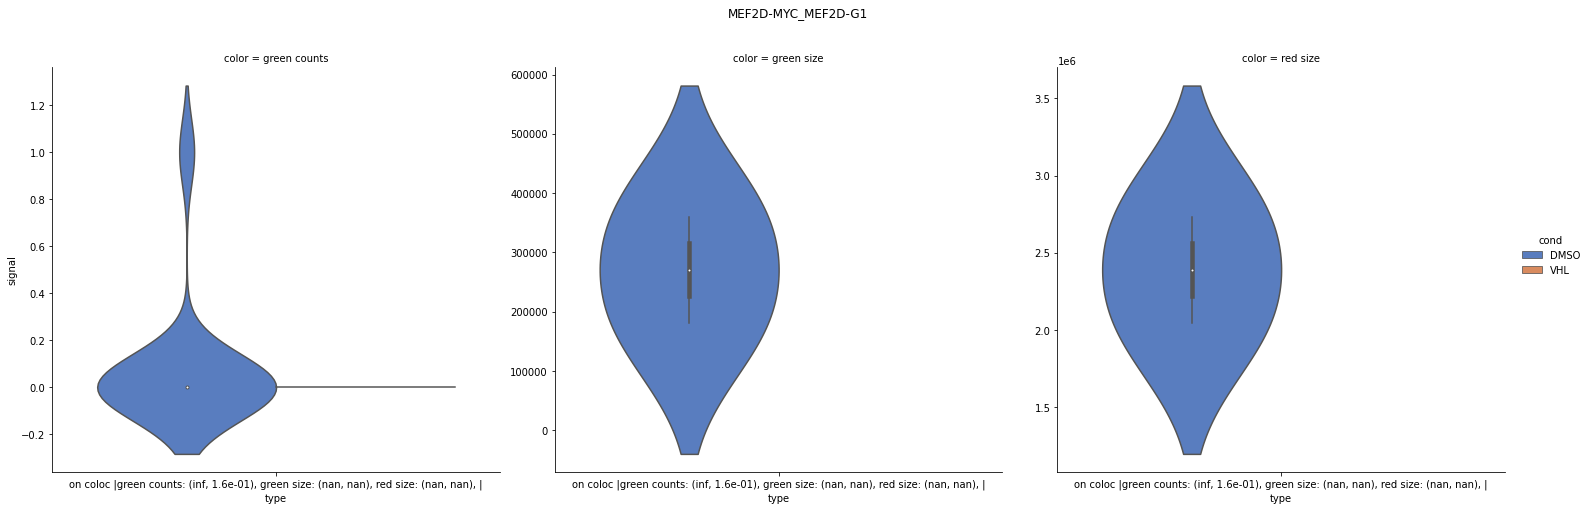

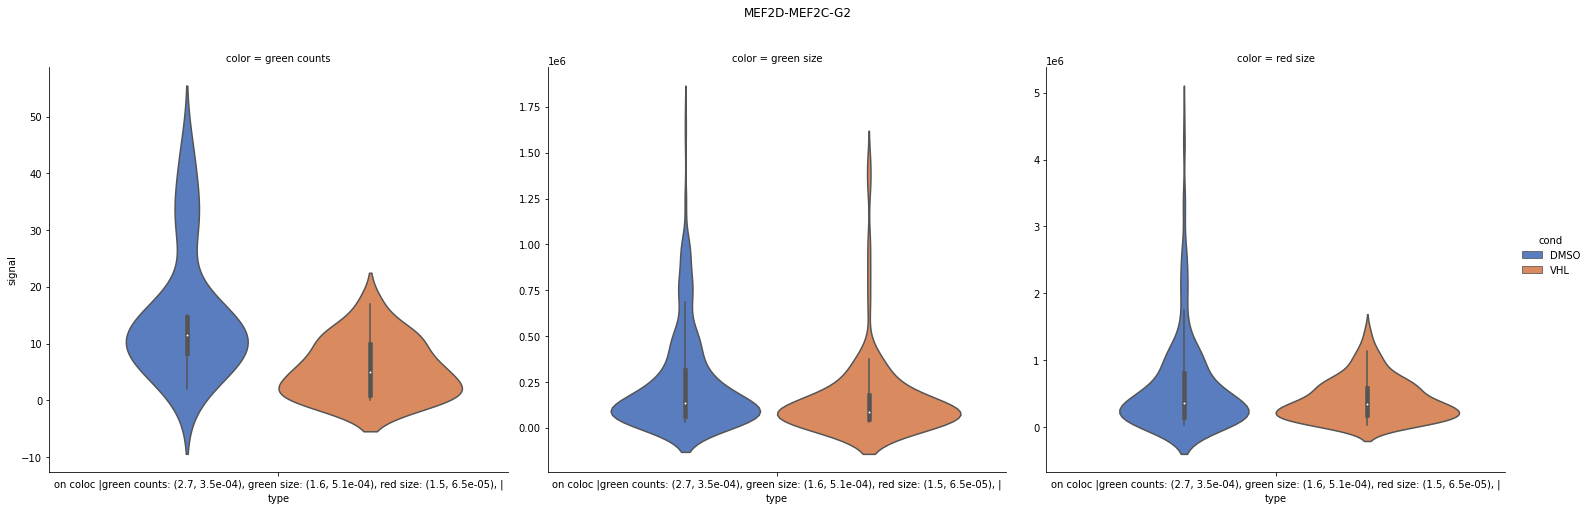

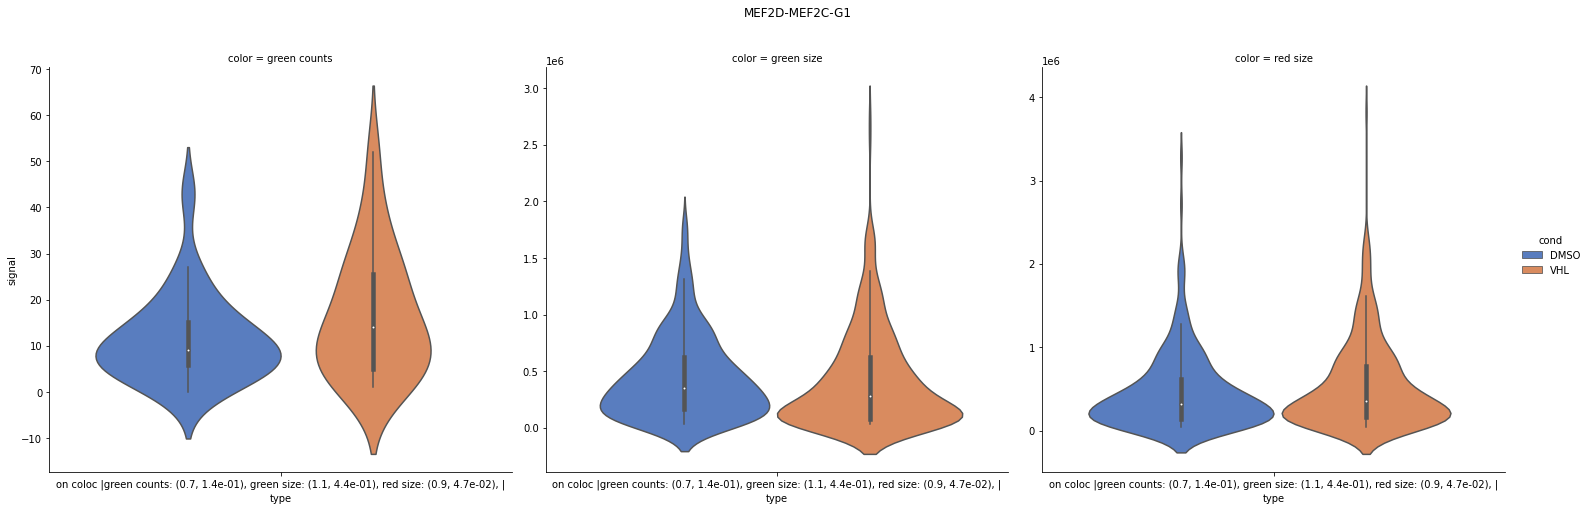

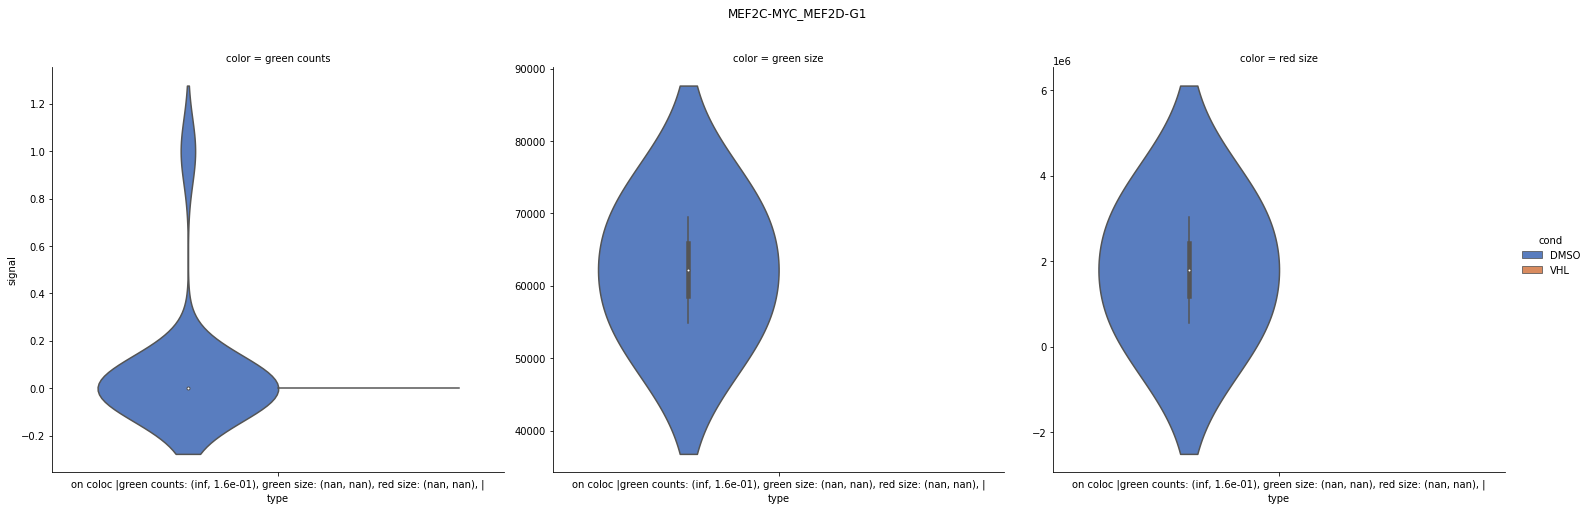

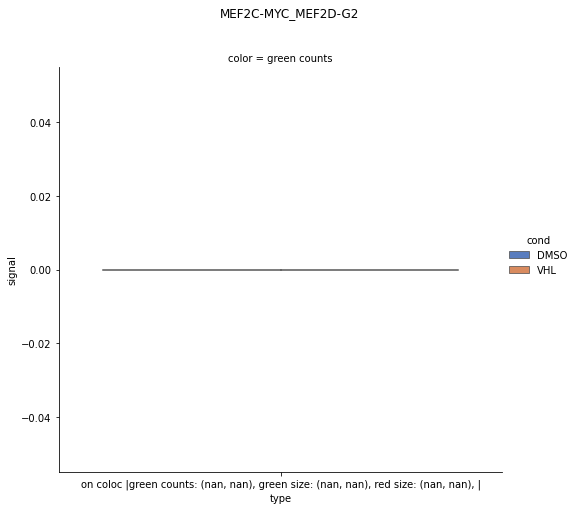

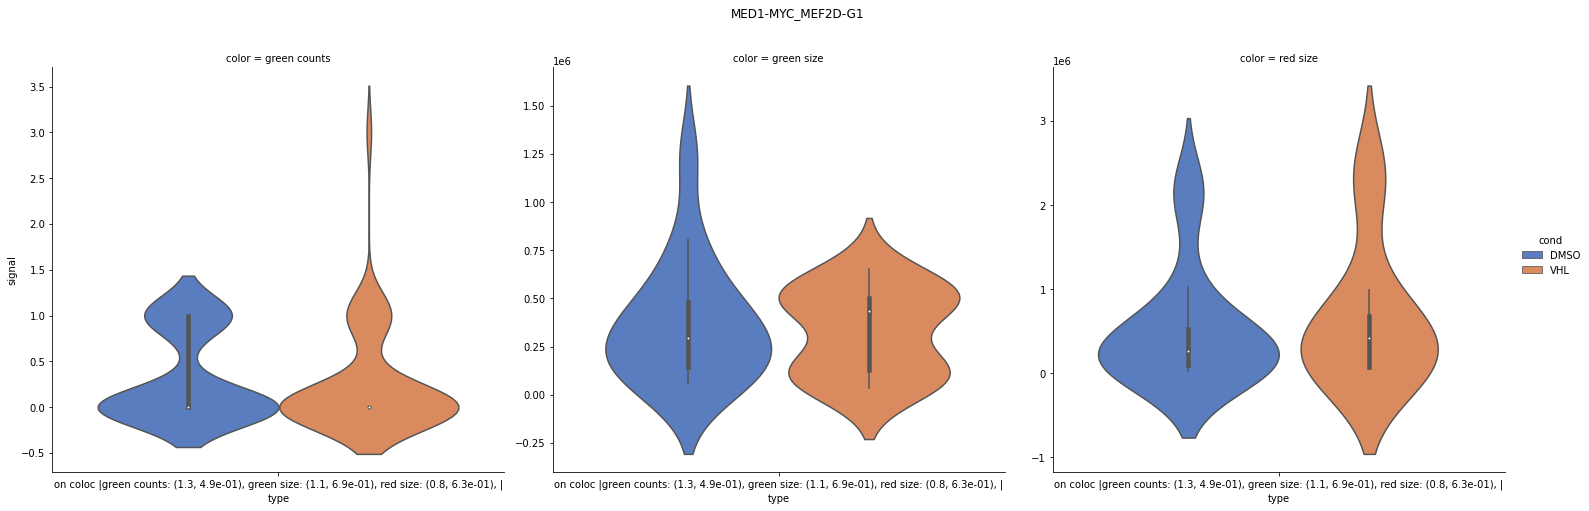

In [367]:
for k, val in data.items():
    g = sns.catplot(kind="violin", x="type", y="signal", hue="cond", col="color", data=val, palette="muted", sharey=False, height=7)
    g.fig.subplots_adjust(top=0.86)
    g.fig.suptitle(k)
    plt.show()
    g.savefig(folder+k+"_violin_oncobinding.pdf")

### on all

In [368]:
# compute difference in number/surface/max/min/mean(val) of green /red across cells and cobindings
data = {}
typ = [("sum_green_sum", "green sum"), ('sum_red_sum', "red sum"), ('mean_red_mean', "red mean"), ('mean_green_mean', "green mean"), ("area_sum", "size")]
for k in set(mdots.exp):
    print(k)
    print('______________________________\n')
    at = pd.DataFrame()
    
    for t in ['DMSO', 'VHL']:
        print(t)
        d = mdots[(mdots.exp==k)&(mdots.treat==t)]
        
        # counts per cell
        a = pd.DataFrame()
        b = pd.DataFrame()
        print("\ncount greens per cell:")
        e = [len(d[(d["group"]==cell)&(d['class']=="green")]) for cell in set(d.group)]
        print(min(e))
        print(np.mean(e), np.sqrt(np.var(e)))
        
        b["color"] = ['on green']*len(e)
        b['signal'] = e
        a = a.append(b)
        
        b = pd.DataFrame()
        e = [len(d[(d["group"]==cell)&(d['class']=="red")]) for cell in set(d.group)]
        b["color"] = ['on red']*len(e)
        b['signal'] = e
        a = a.append(b)
        
        b = pd.DataFrame()
        e = [len(d[(d["group"]==cell)&(d['class']=="cobinding")]) for cell in set(d.group)]
        b["color"] = ['on coloc']*len(e)
        b['signal'] = e
        a = a.append(b)
        
        a['type'] = "counts"
        a['cond'] = t
        at = at.append(a)
        
        # TOTAL signal
        
        b = pd.DataFrame()
        print("\ntotal signal greens per cell:")
        e = [sum(d[(d["group"]==cell)&(d['class']=="green")]['sum_green_sum']) for cell in set(d.group)]
        print(min(e))
        print(np.mean(e), np.sqrt(np.var(e)))
        
        b["color"] = ['on green']*len(e)
        b['signal'] = e
        a.append(b)
        
        b = pd.DataFrame()
        e = [sum(d[(d["group"]==cell)&(d['class']=="red")]['sum_red_sum']) for cell in set(d.group)]
        b["color"] = ['on red']*len(e)
        b['signal'] = e
        a = a.append(b)
        
        b = pd.DataFrame()
        e = [sum(d[(d["group"]==cell)&(d['class']=="cobinding")]['sum_green_sum']) for cell in set(d.group)]
        b["color"] = ['on coloc']*len(e)
        b['signal'] = e
        a.append(b)
        
        a['type'] = "total sum"
        a['cond'] = t
        at = at.append(a)
        
        for (col,name) in typ:
            print(name)
            a = pd.DataFrame()
            print('\nsignal in green:')
            e = d[d['class']=="green"][col].tolist()
            print(np.mean(e), np.sqrt(np.var(e)))
            b = pd.DataFrame()
            b['signal'] = e
            b['color'] = "on green"
            a = a.append(b)
            
            print('\nsignal in red:')
            e = d[d['class']=="red"][col].tolist()
            print(np.mean(e), np.sqrt(np.var(e)))
            
            b = pd.DataFrame()
            b['signal'] =  e
            b['color'] = "on red"
            a = a.append(b)

            print('\nsignal in cobinding:')
            e = d[d['class']=="cobinding"][col].tolist()
            print(np.mean(e), np.sqrt(np.var(e)))
            
            b = pd.DataFrame()
            b['signal'] = e
            b['color'] = "on coloc"           
            print('\n\n')
            a = a.append(b)
            a['type']=name
            a['cond'] = t
            at = at.append(a)
        print('____________\n')
    data[k] = at.reset_index(drop=True)
    
# adding chi2
for k,val in data.items():
    for i in set(val['type']):
        e = " |"
        for u in ['on green', "on red", "on coloc"]:#set(val['color']):
            a = val[(val['type'] == i) & (val['color'] == u) & (val['cond'] == "DMSO")]["signal"].tolist()
            b = val[(val['type'] == i) & (val['color'] == u) & (val['cond'] == "VHL")]["signal"].tolist()
            r = ttest_ind(a, b, equal_var=False)
            e+= u + ": ("f"{np.mean(a)/np.mean(b):.1f}, "f"{r[1]:.1e}), "
        val.loc[val[val['type'] == i].index, 'type'] = i + e +"|"
    data[k] = val

MEF2D-MYC_MEF2D-G1
______________________________

DMSO

count greens per cell:
0
141.46153846153845 200.01504381290746

total signal greens per cell:
0
99031231.6923077 236900013.53370842
green sum

signal in green:
700057.6465470365 1121721.1667776324

signal in red:
260275.75438596492 332112.3998030217

signal in cobinding:
2021220.5 525499.5



red sum

signal in green:
159349.87737901034 189261.0585052119

signal in red:
5818733.140350877 6536614.274329838

signal in cobinding:
16920444.5 5066850.5



red mean

signal in green:
779.517516927957 627.6283435306041

signal in red:
4228.277974162644 1318.289370855427

signal in cobinding:
6545.9709892574065 1249.4890466124734



green mean

signal in green:
2426.165121017242 868.6293373264833

signal in red:
250.03143580078984 231.16353095121735

signal in cobinding:
1009.4053917086851 82.80455460059301



size

signal in green:
228912.03126699294 246789.3091705746

signal in red:
1117670.894736842 959748.0683276501

signal in cobindi

/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



total signal greens per cell:
27364638.0
78501223.34615384 41812011.31675683
green sum

signal in green:
611636.7416841474 860230.7170667215

signal in red:
147096.97910135842 308021.5847259859

signal in cobinding:
1891262.9208211144 2020996.1362675603



red sum

signal in green:
743504.9044051543 1102506.412891556

signal in red:
3549732.606583072 5341065.606951432

signal in cobinding:
10671614.680351906 12027278.850823194



red mean

signal in green:
3731.302142481981 2414.627101602329

signal in red:
9599.184439853982 2838.2950005250505

signal in cobinding:
10135.384977420617 3213.8992550928624



green mean

signal in green:
2895.2830202439886 1173.0706978731284

signal in red:
432.18738045157244 494.10793539484786

signal in cobinding:
2197.189243360367 1191.3484889493018



size

signal in green:
195295.1890919988 229656.21683121135

signal in red:
331091.5773249739 380985.6102856037

signal in cobinding:
921057.6656891495 751433.624767618



____________

VHL

count greens

64
224.6078431372549 157.03915815294974

total signal greens per cell:
12249984.0
87112200.37254901 77368409.23090303
green sum

signal in green:
387841.3111305107 572922.4256433384

signal in red:
75427.32653061225 131378.07884691274

signal in cobinding:
957108.7692307692 858449.6937126883



red sum

signal in green:
35311.76045395024 99651.43635374871

signal in red:
1487814.8673469387 2453384.319334307

signal in cobinding:
2020074.3076923077 2990963.357067737



red mean

signal in green:
144.28580559897807 267.9911393595846

signal in red:
2116.0918862793064 1522.976670772802

signal in cobinding:
1695.3921380884703 1273.3512938129684



green mean

signal in green:
1366.9229984371532 619.2795285219264

signal in red:
144.8720257300083 228.53483547508912

signal in cobinding:
1191.1414118331077 670.3848577395777



size

signal in green:
232057.4752509821 211964.3606629825

signal in red:
424022.6632653061 544465.4839497276

signal in cobinding:
940672.5384615385 822029.61646240

<ipython-input-368-a0399e1665f2>:112: RuntimeWarning: divide by zero encountered in double_scalars
  e+= u + ": ("f"{np.mean(a)/np.mean(b):.1f}, "f"{r[1]:.1e}), "
<ipython-input-368-a0399e1665f2>:112: RuntimeWarning: invalid value encountered in double_scalars
  e+= u + ": ("f"{np.mean(a)/np.mean(b):.1f}, "f"{r[1]:.1e}), "


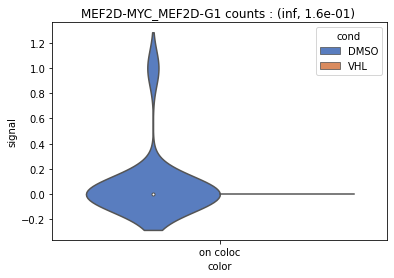

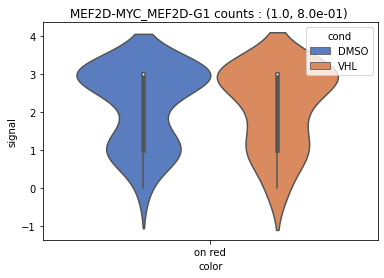

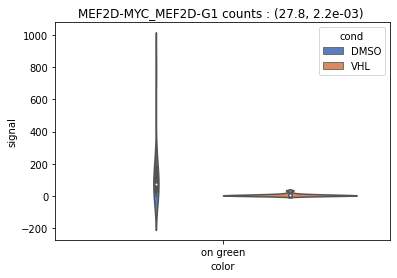

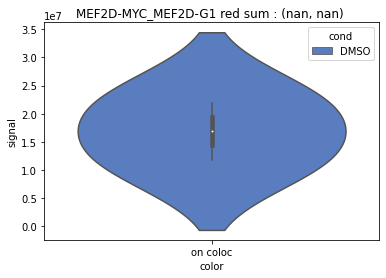

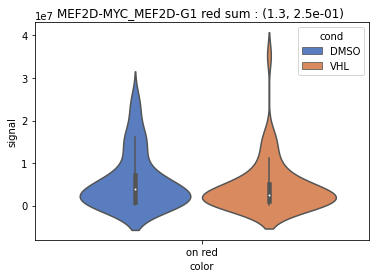

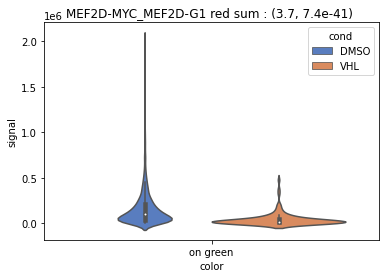

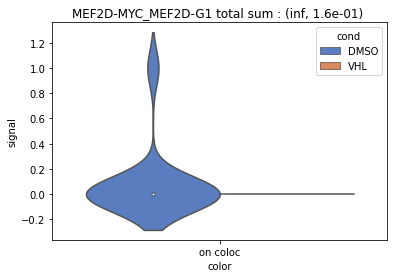

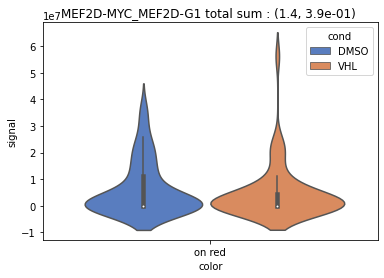

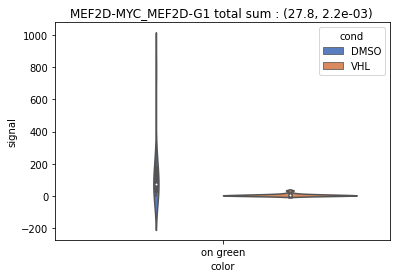

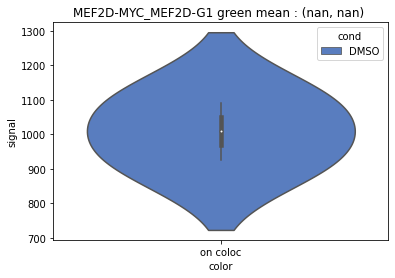

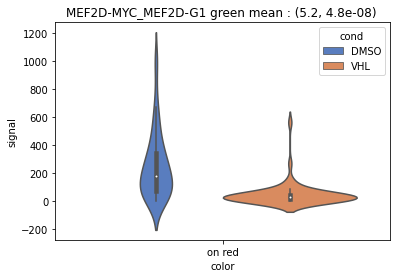

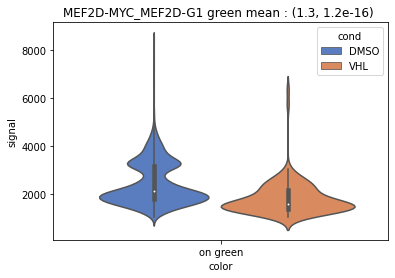

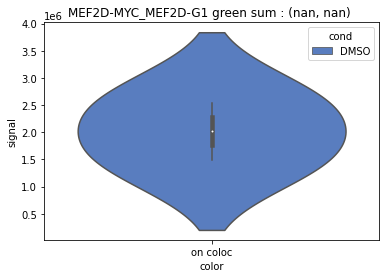

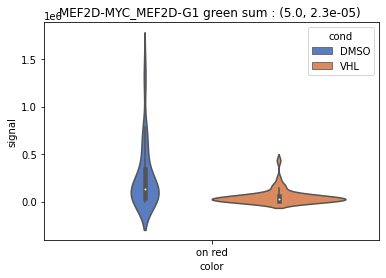

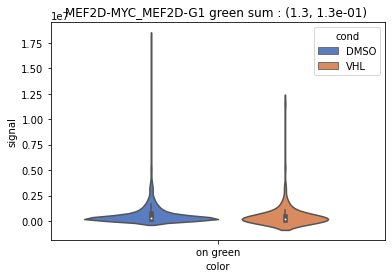

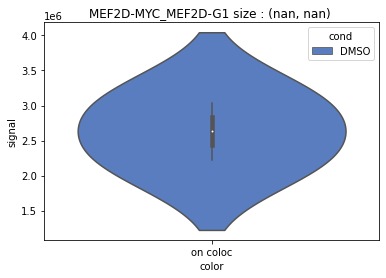

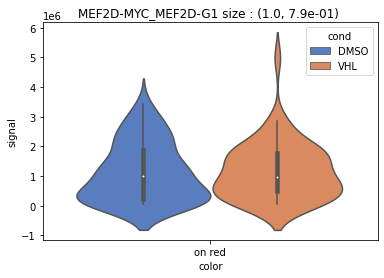

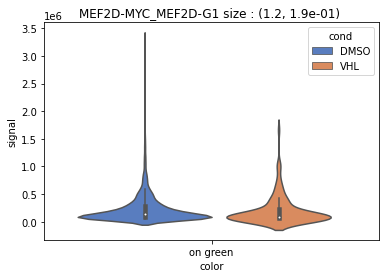

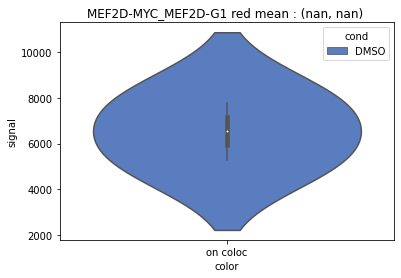

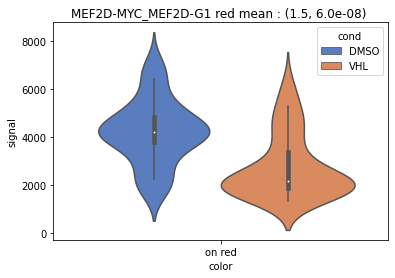

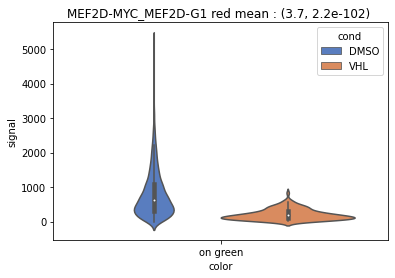

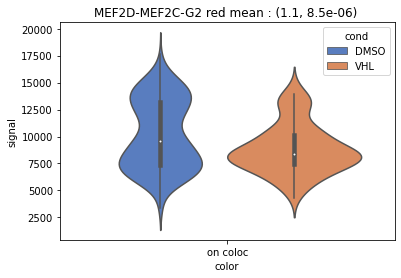

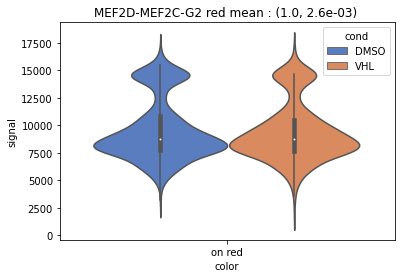

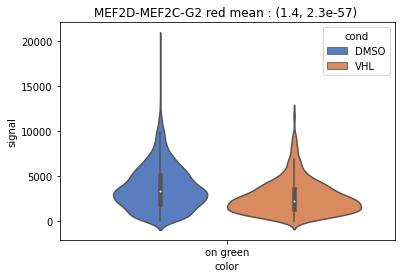

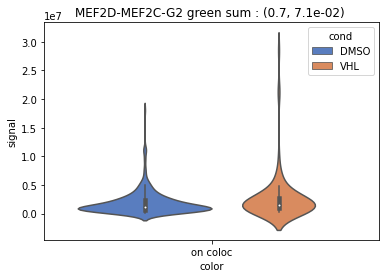

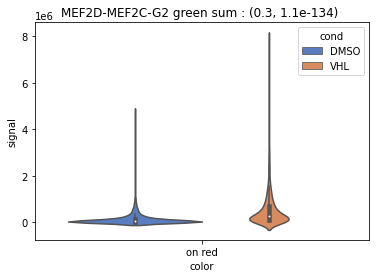

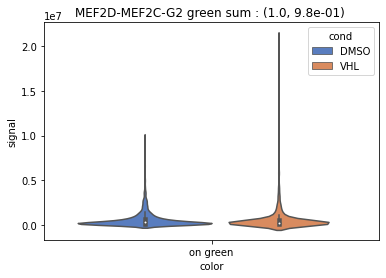

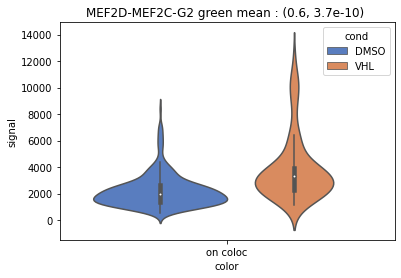

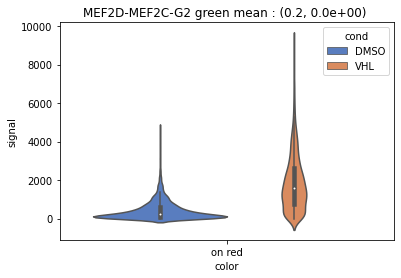

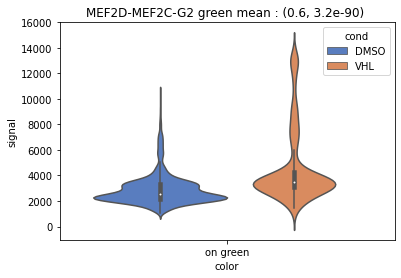

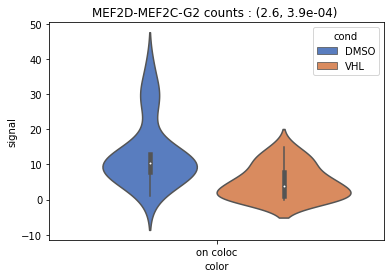

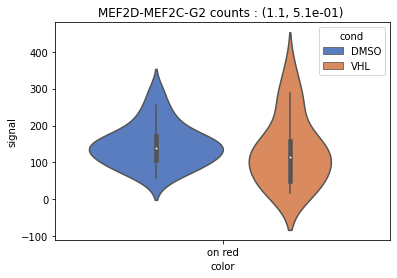

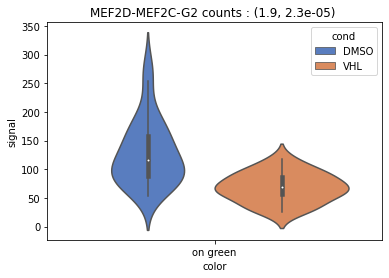

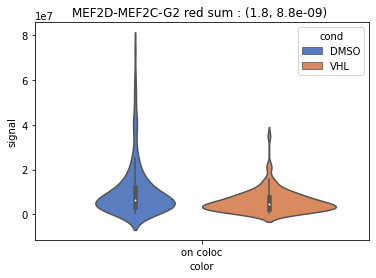

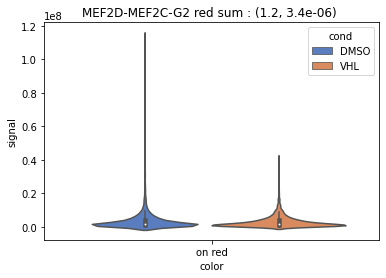

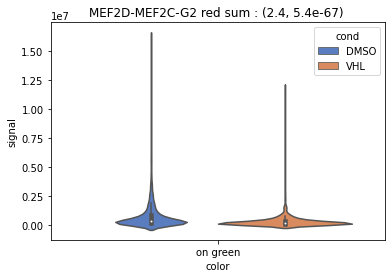

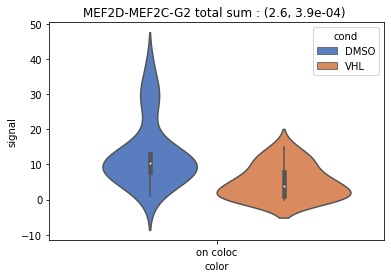

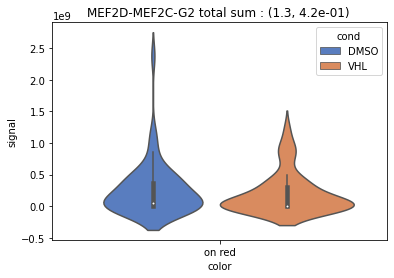

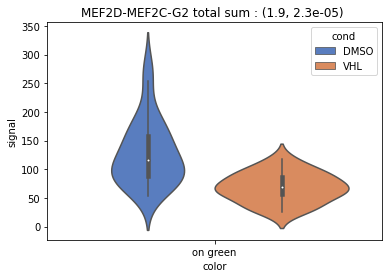

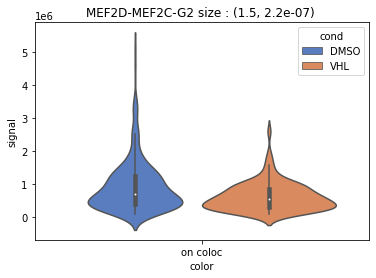

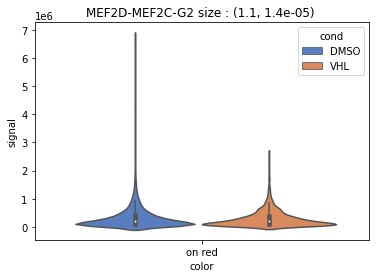

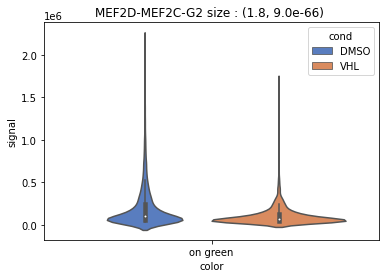

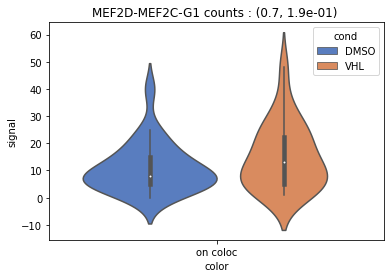

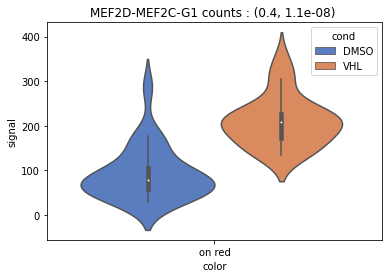

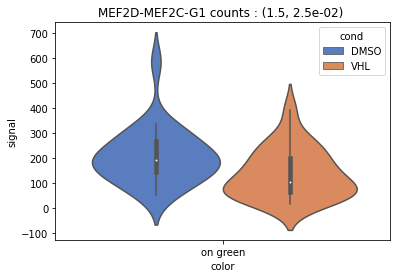

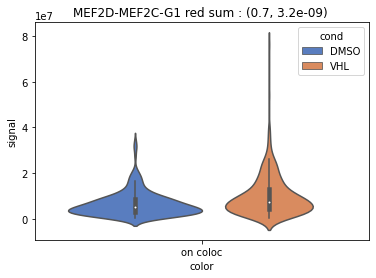

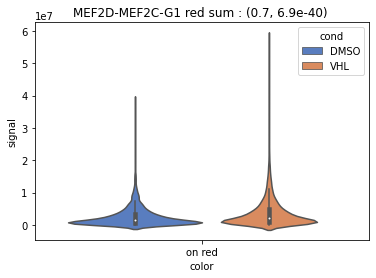

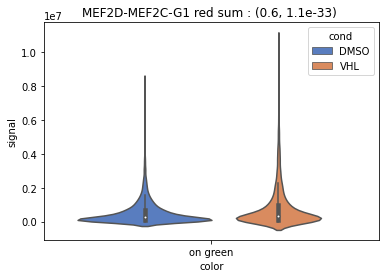

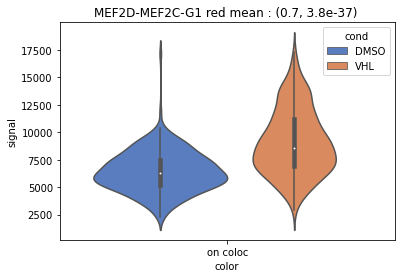

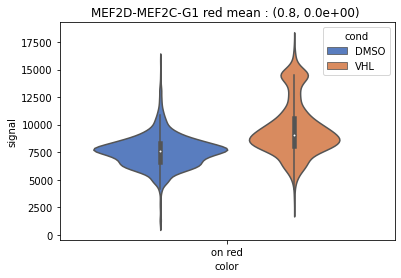

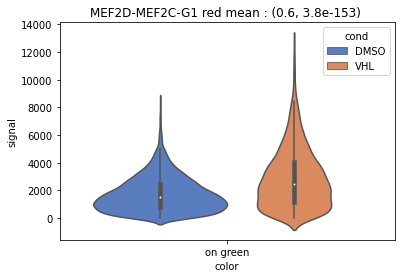

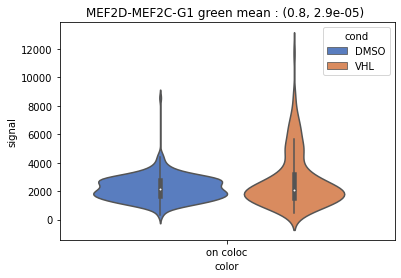

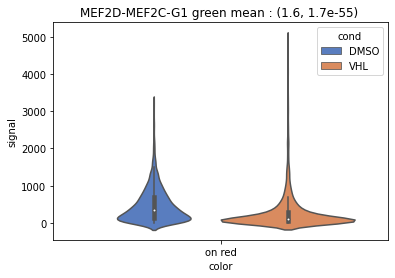

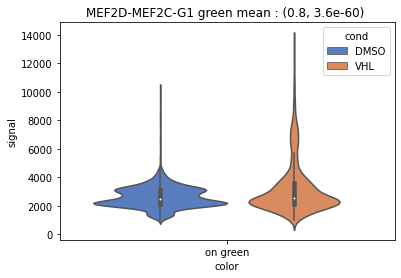

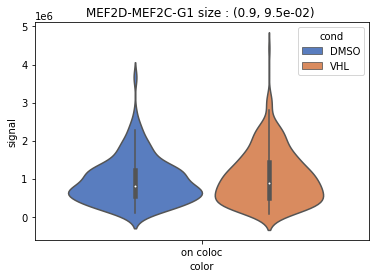

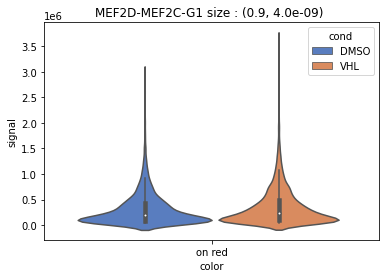

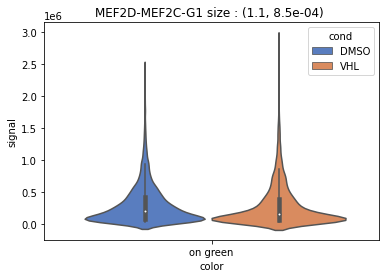

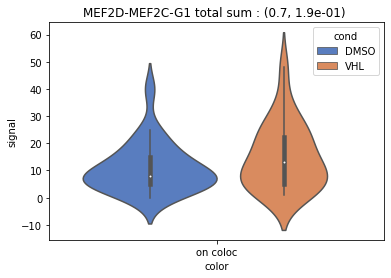

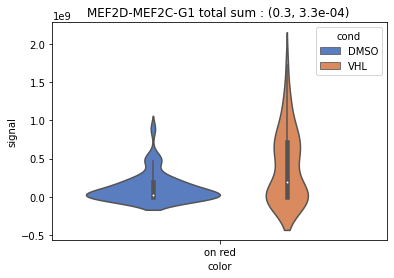

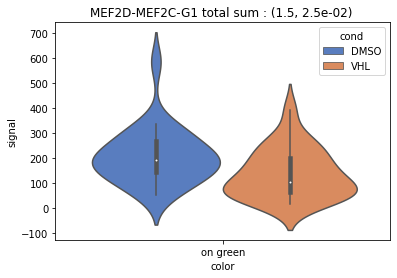

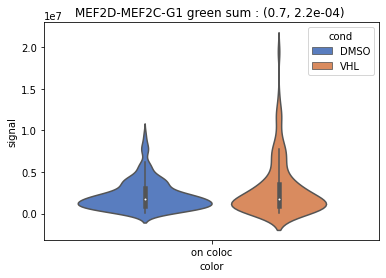

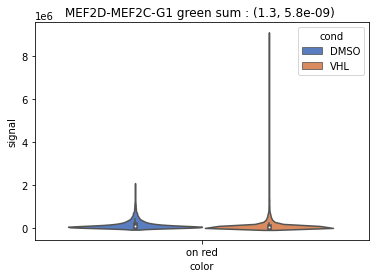

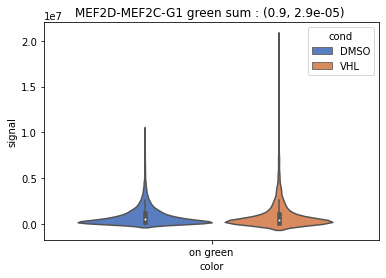

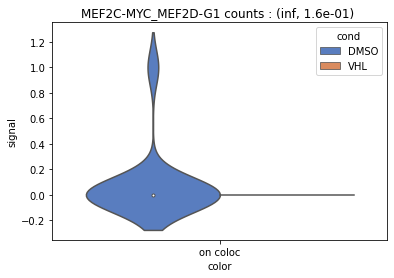

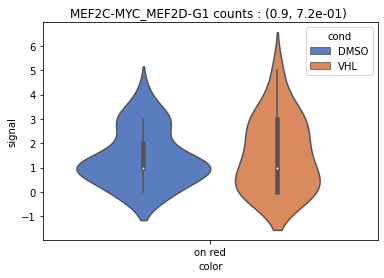

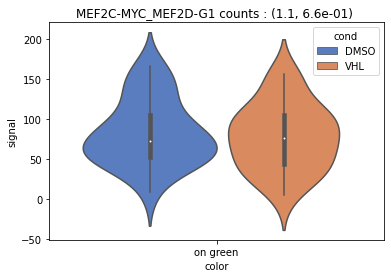

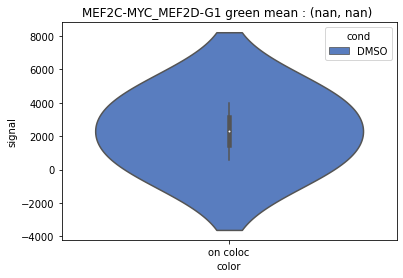

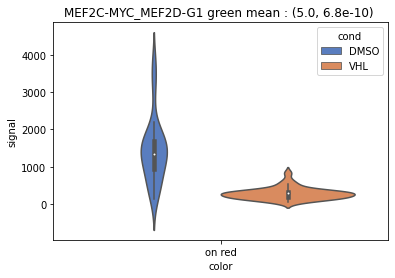

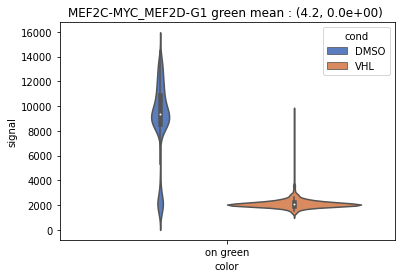

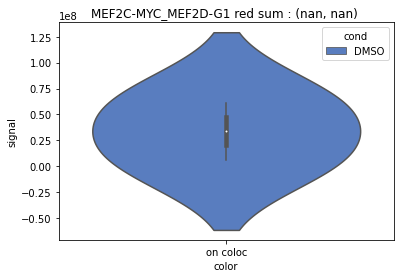

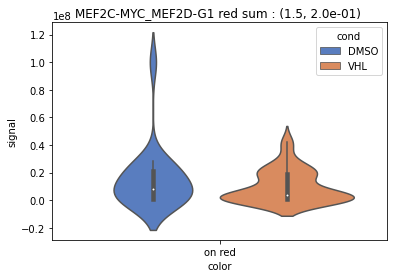

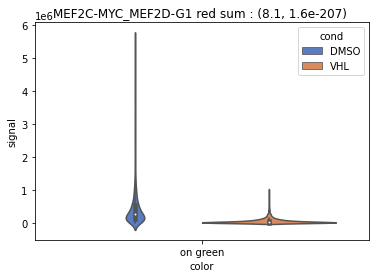

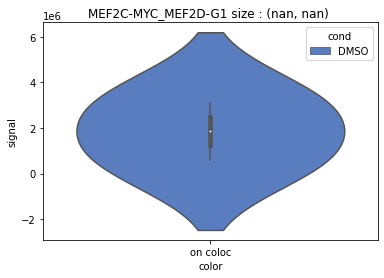

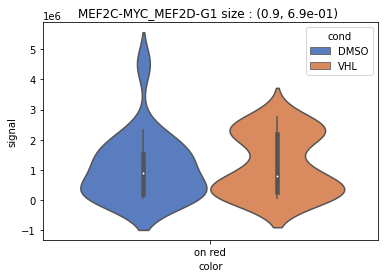

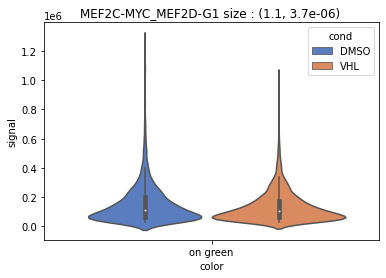

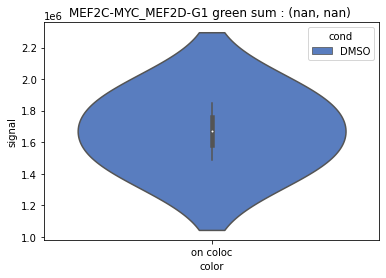

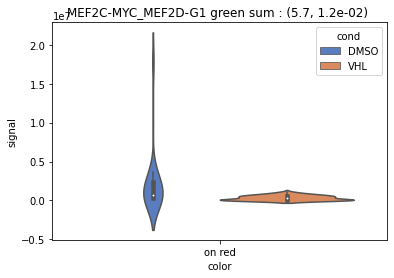

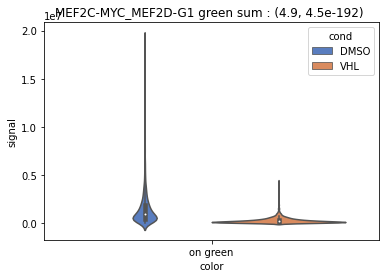

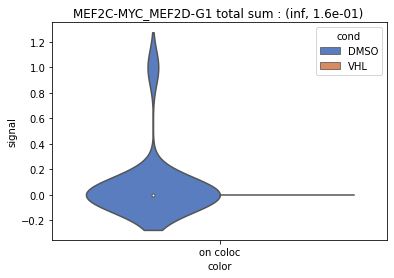

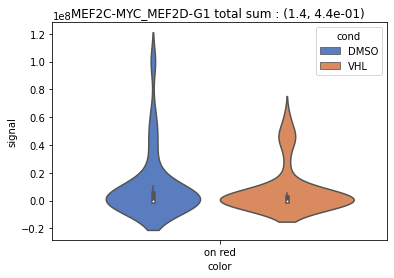

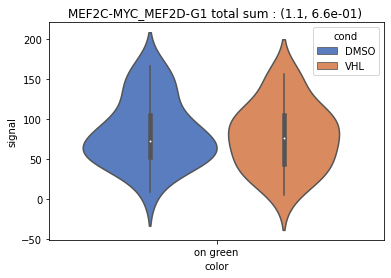

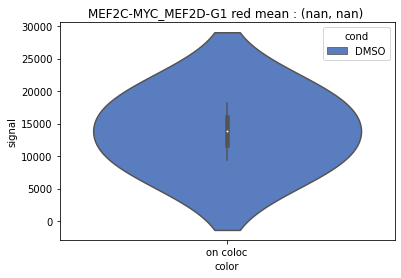

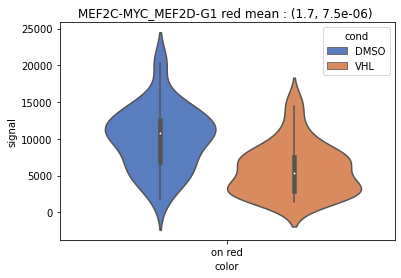

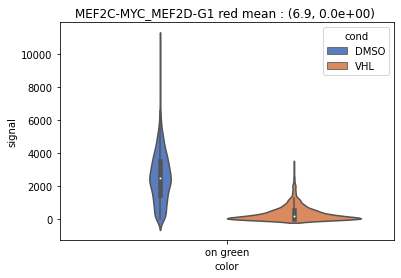

ValueError: min() arg is an empty sequence

In [369]:
for k, v in data.items():
    for l in set(v['type']):
        for m in set(v['color']):
            ax = sns.violinplot(data = v[(v['type']==l)&(v['color']==m)], x="color", y="signal", hue="cond", palette="muted")
            plt.title(k+" "+l.split('|')[0]+""+l.split(m)[-1].split('),')[0]+") ")
            
            plt.show()
            
            ax.get_figure().savefig(folder+k+'_single_'+l.split(' |')[0]+"_"+m+".pdf")

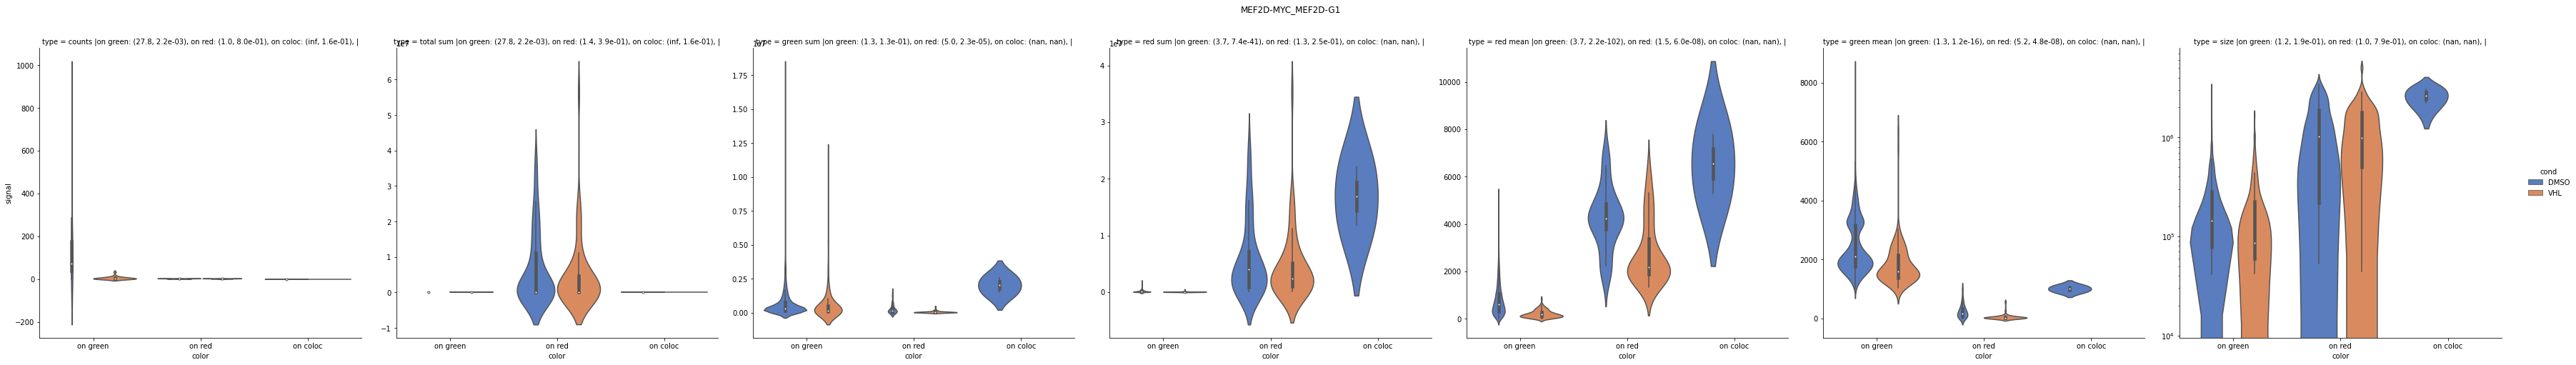

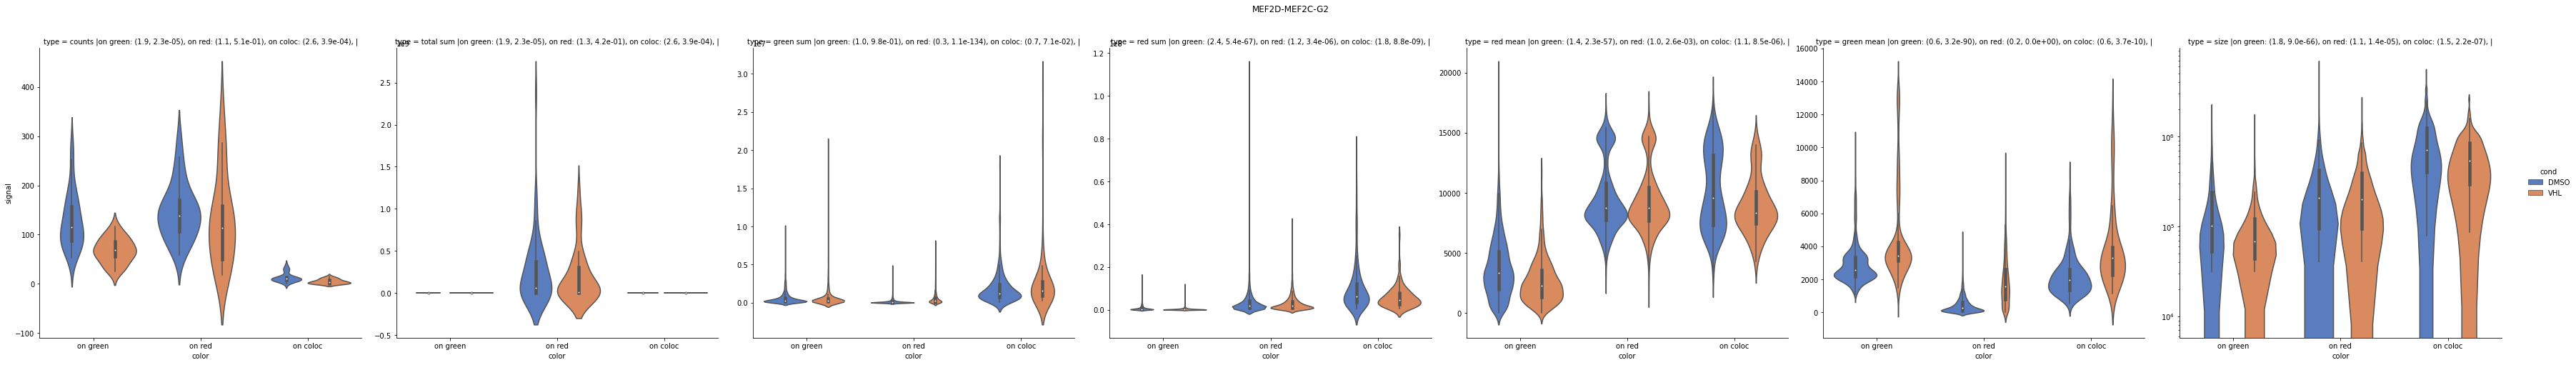

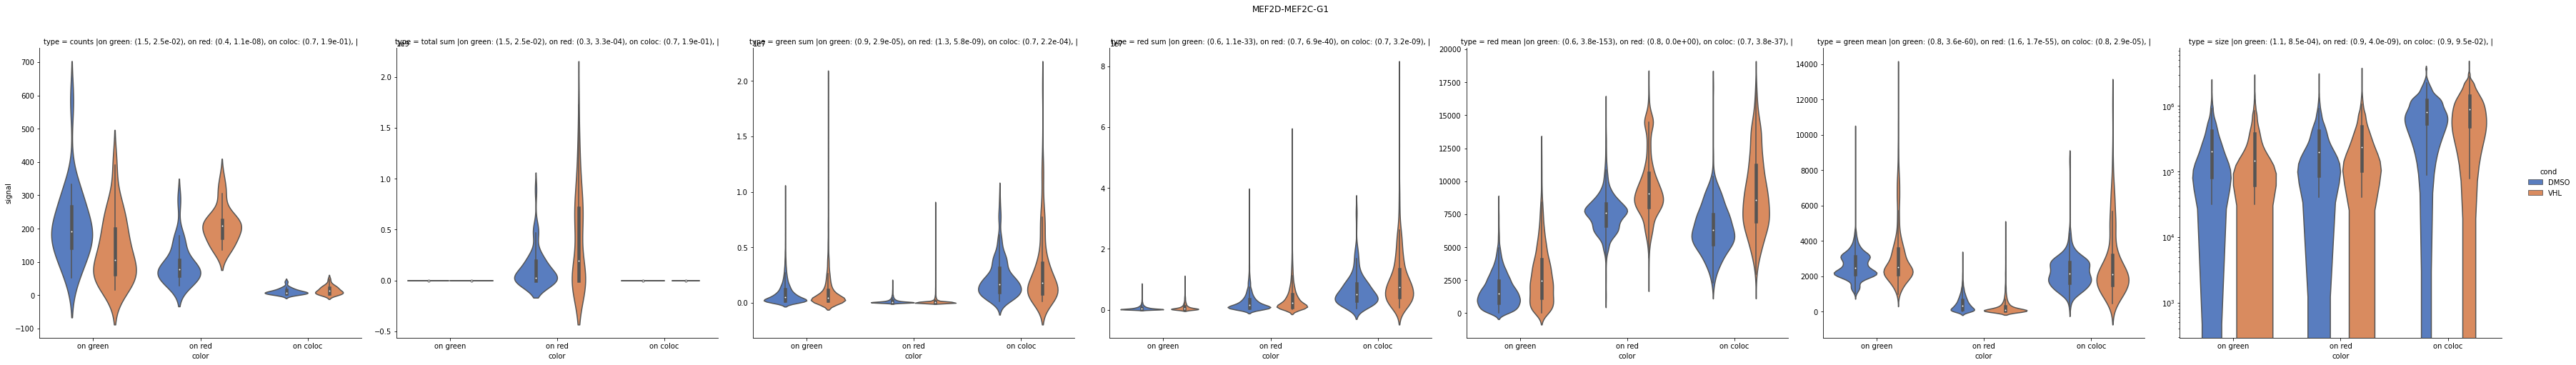

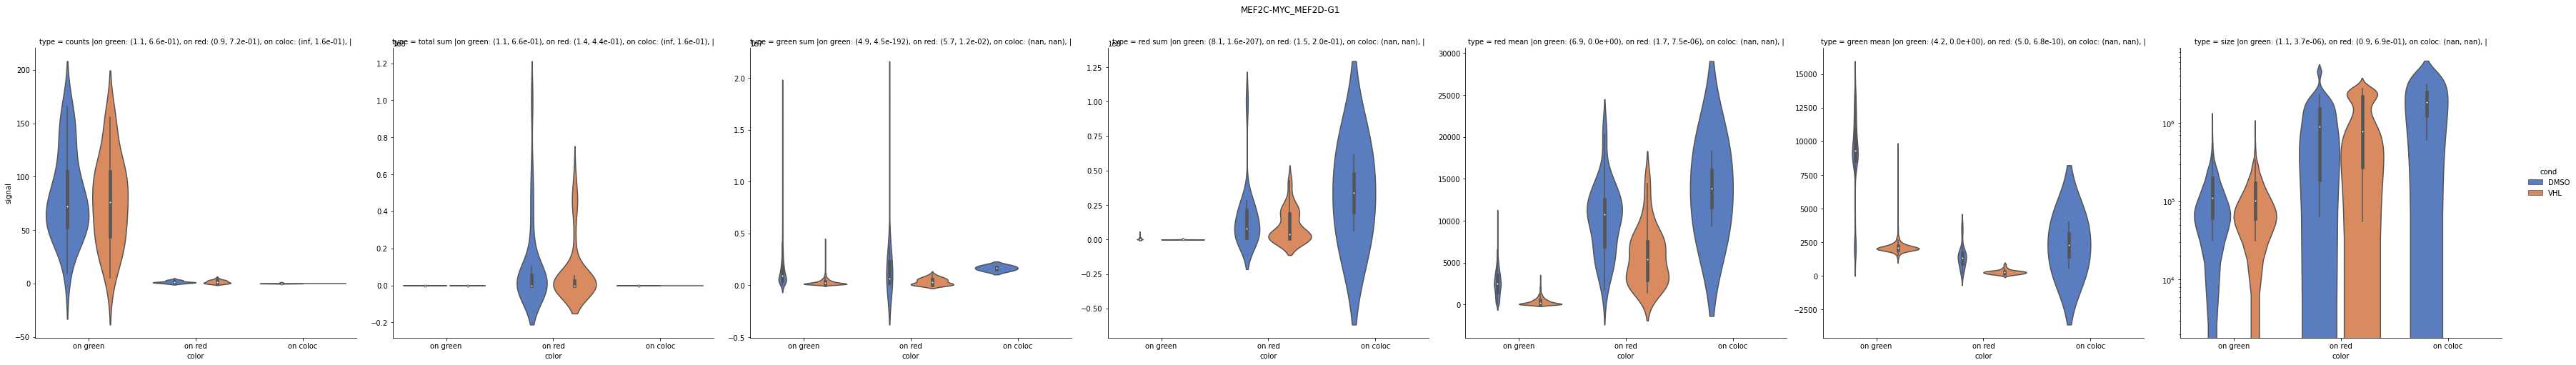

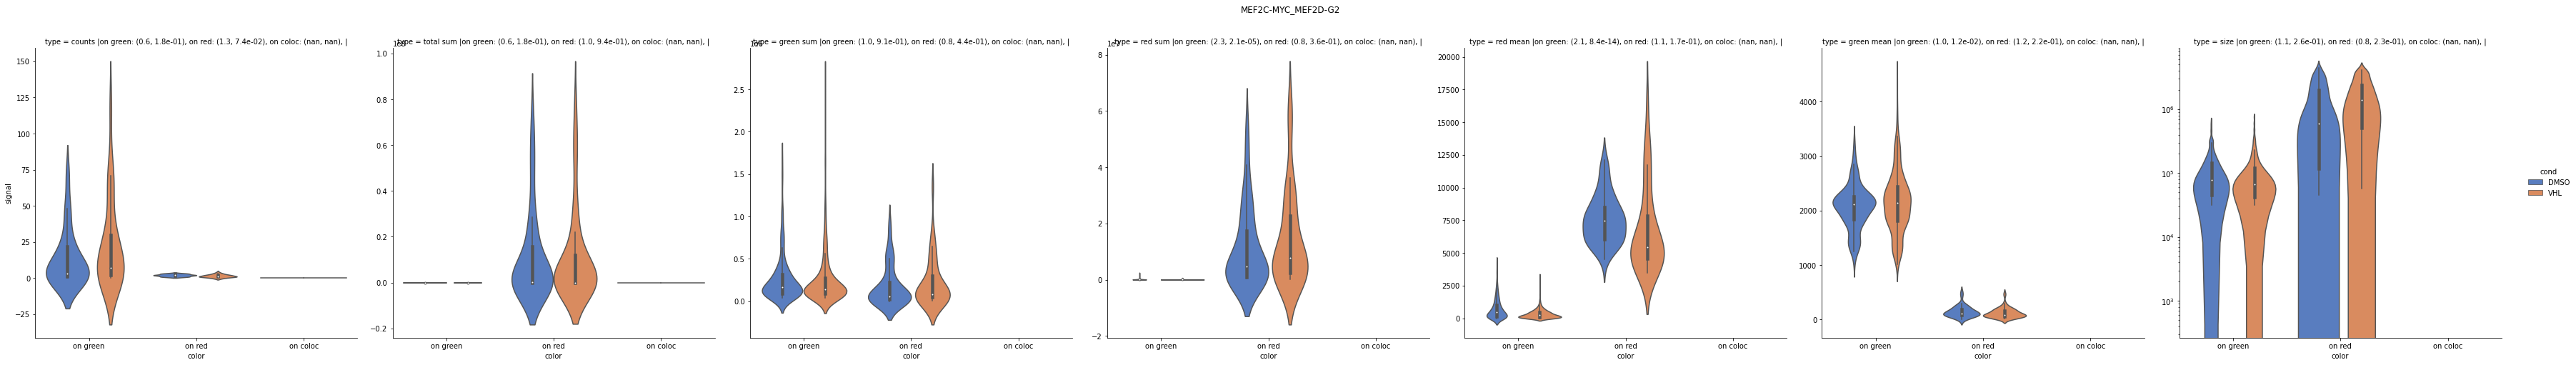

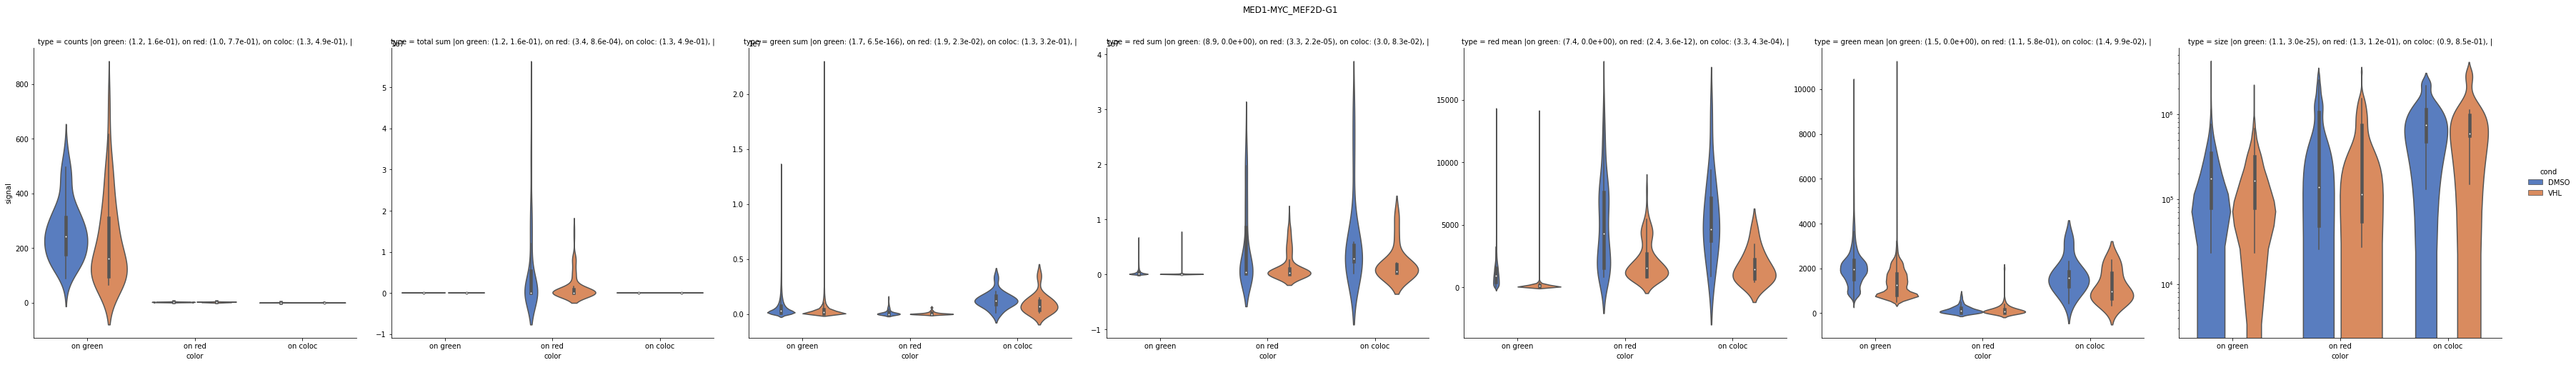

In [370]:
for k, val in data.items():
    g = sns.catplot(kind="violin", x="color", y="signal", hue="cond", col="type", data=val, palette="muted", sharey=False, height=7)
    g.fig.subplots_adjust(top=0.86)
    g.fig.suptitle(k)
    plt.yscale('log')
    plt.show()
    g.savefig(folder+k+"_violin_all.pdf")

/home/jeremie/.local/lib/python3.8/site-packages/venn/_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
/home/jeremie/.local/lib/python3.8/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn2()` is retained for backwards compatibility; use `venn()` instead
  warn((


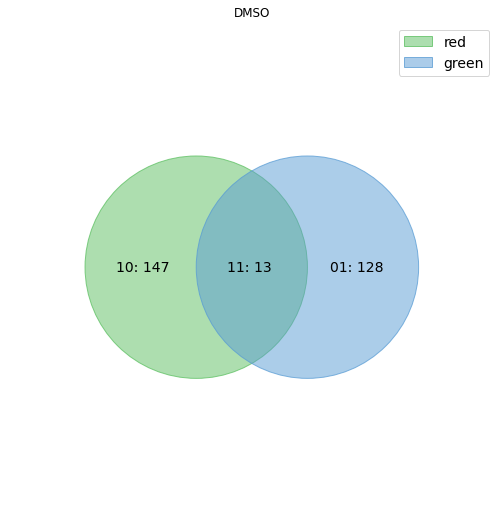

<Figure size 432x288 with 0 Axes>

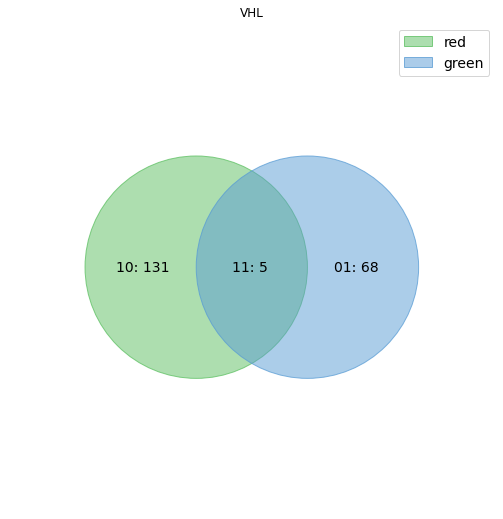

In [371]:
for val in ['MEF2D-MEF2C-G2','MEF2D-MEF2C-G1']:
    a = data[val]
    for v in ['DMSO','VHL']:
        f = int(a[(a.color=="on green")&(a.cond==v)&(a.type.str.contains('counts'))].signal.mean())
        e = int(a[(a.color=="on red")&(a.cond==v)&(a.type.str.contains('counts'))].signal.mean())
        i = int(a[(a.color=="on coloc")&(a.cond==v)&(a.type.str.contains('counts'))].signal.mean())
        c = f
        f = [u for u in range(f)]
        pe = [u for u in range(c, e+c)]
        c+=e
        e=pe
        e.extend([u for u in range(c, c+i)])
        f.extend([u for u in range(c, c+i)])
        plot.venn([set(e),set(f)], ["red", "green"], title=v)
        plt.savefig(folder+'MEF2D-MEF2C_venn'+v+'_mean_percell.pdf')

## likelyhood of coloc compared to expectation for each experiment &  between conditions

In [106]:
# compute dot likelyhood of coloc compared to expectation for each experiment &  between conditions
enrichment = {}

for k in set(mdots.exp):
    count = []
    fisher = []
    print('______________________________')
    print(k)
    for e in ['DMSO', 'VHL']:
        d = mdots[(mdots.exp==k)&(mdots.treat==e)]
        allredcount = len(d[d['class']!="green"])
        try:
            obs_cob = len(d[d['class']=="cobinding"])/allredcount
        except ZeroDivisionError:
            print('no red dot')
            continue
        obs_green = d[d['class']=="green"].area_sum.sum() * call_scale
        pred_cob = obs_green / mcells[(mcells.exp==k)&(mcells.treat==e)].area_sum.sum()
        #print(obs_cob, obs_green, pred_cob)
        count.append(obs_cob/pred_cob)
        print(e+": "+str(obs_cob/pred_cob))
        a = pred_cob*allredcount
        b = obs_cob*allredcount
        f = fisher_exact(np.array([[b, allredcount - b], [a, allredcount - a]], dtype=int))
        if f[0] is np.inf:
            f = (obs_cob/pred_cob, f[1])
        fisher.append(f)
    enrichment[k] = fisher
    print("change: "+str(count[1]/count[0]))

______________________________
MEF2D-MEF2C
DMSO: 13.841794817020828
VHL: 11.898415397041463
change: 0.8596006193077178
______________________________
MEF2C-MYC_MEF2D
DMSO: 32.48757909016166
VHL: 0.0
change: 0.0
______________________________
MED1-MYC_MEF2D
DMSO: 10.209055232858642
VHL: 20.621252445517072
change: 2.0198982153751075
______________________________
MEF2D-MYC_MEF2D
DMSO: 13.410769966229607
VHL: 0.0
change: 0.0


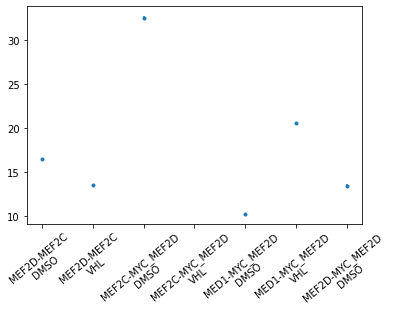

In [107]:
x=[]
y=[]
e=[]
for k, val in enrichment.items():
    x.append(k+'\nDMSO')
    y.append(val[0][0])
    e.append(val[0][1])
    x.append(k+'\nVHL')
    y.append(val[1][0])
    e.append(val[1][1])
plt.errorbar(x, y, e, linestyle='None', marker='.')
plt.xticks(rotation = 40) # Rotates X-Axis Ticks by 45-degrees
plt.savefig(folder+'enrichments.pdf')

## plot of averaged binned signal by distance from focis

In [372]:
# make a plot of averaged binned signal strength by distance from locis
twodists, dists = fish.computeDistsFromClass(agreen, mred, conds=['DMSO', 'VHL'], groupcol="group", sclass='green', signal="mean_green", area="area")

MEF2D-MYC_MEF2D-G1 DMSO
MEF2D-MYC_MEF2D-G1 VHL
MEF2D-MEF2C-G2 DMSO
MEF2D-MEF2C-G2 VHL
MEF2D-MEF2C-G1 DMSO
MEF2D-MEF2C-G1 VHL
MEF2C-MYC_MEF2D-G1 DMSO
MEF2C-MYC_MEF2D-G1 VHL
MEF2C-MYC_MEF2D-G2 DMSO
MEF2C-MYC_MEF2D-G2 VHL
MED1-MYC_MEF2D-G1 DMSO
MED1-MYC_MEF2D-G1 VHL


<Figure size 432x288 with 0 Axes>

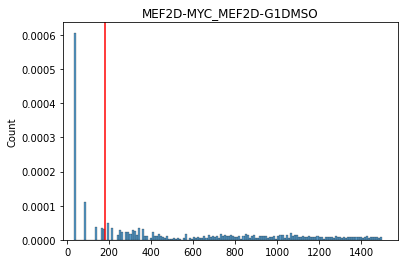

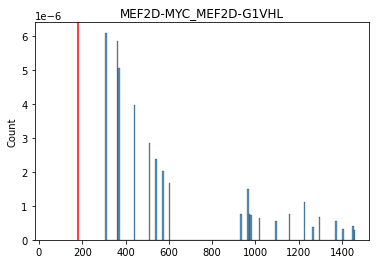

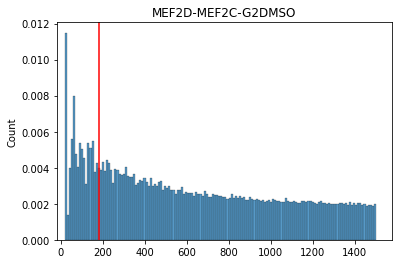

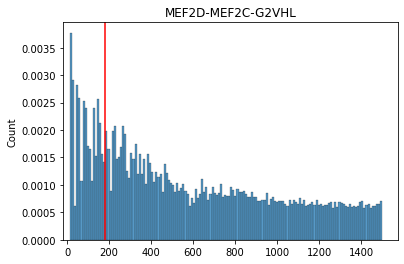

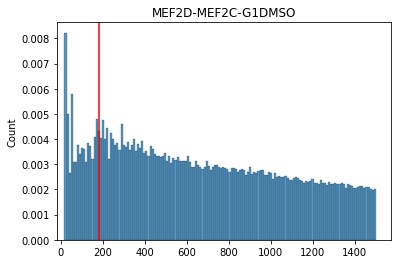

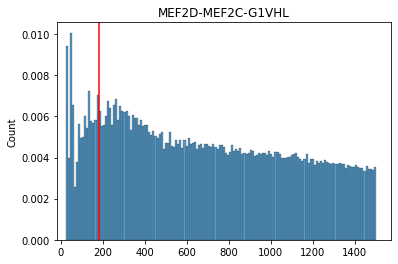

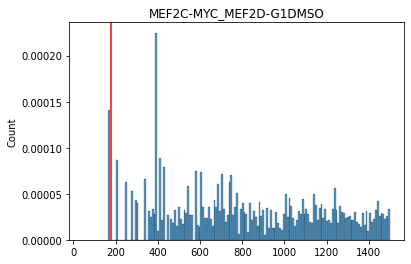

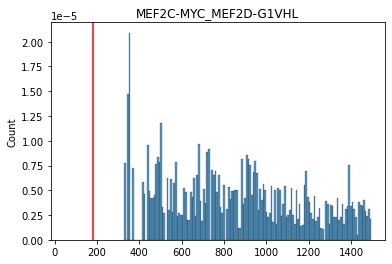

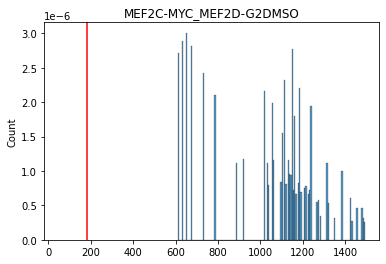

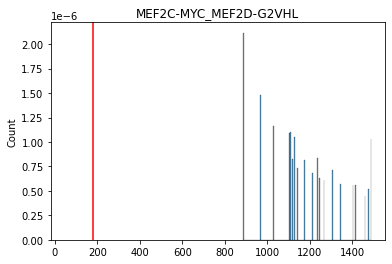

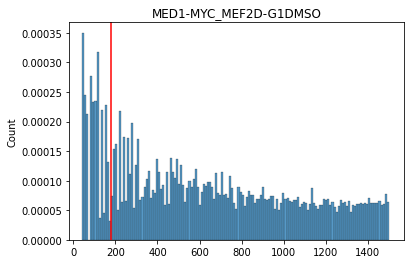

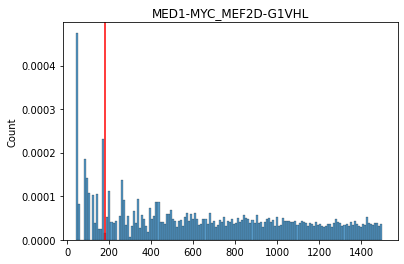

In [373]:
size=1500
bins = 150
defa = size/bins
for k, v in dists.items():
    plt.title(k)
    scale = ((4.19*(defa+v[0][v[0]<size]))**3)-((4.19*(v[0][v[0]<size]))**3)
    ax = sns.histplot(x=v[0][v[0]<size], weights=v[1][v[0]<size]/scale, bins=bins, fill=True)
    plt.axvline(x=180, color="red")
    ax.set(xlim=(-20,None))
    plt.show()
    ax.get_figure().savefig(folder+k+'_1D_distances_from_red.pdf')

In [376]:
twodists.keys()

dict_keys(['MEF2D-MYC_MEF2D-G1DMSO', 'MEF2D-MYC_MEF2D-G1VHL', 'MEF2D-MEF2C-G2DMSO', 'MEF2D-MEF2C-G2VHL', 'MEF2D-MEF2C-G1DMSO', 'MEF2D-MEF2C-G1VHL', 'MEF2C-MYC_MEF2D-G1DMSO', 'MEF2C-MYC_MEF2D-G1VHL', 'MEF2C-MYC_MEF2D-G2DMSO', 'MEF2C-MYC_MEF2D-G2VHL', 'MED1-MYC_MEF2D-G1DMSO', 'MED1-MYC_MEF2D-G1VHL'])

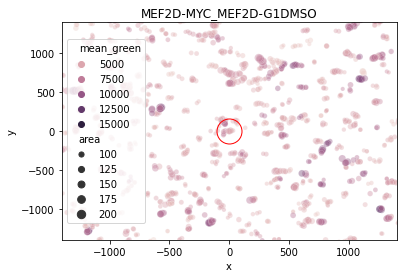

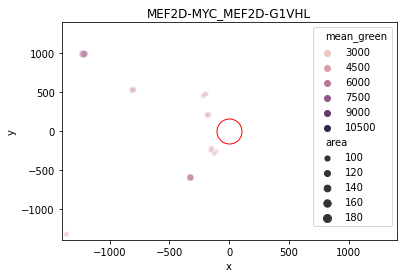

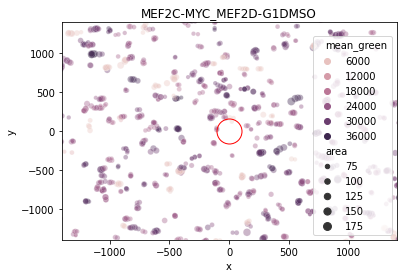

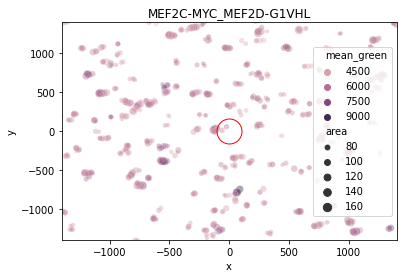

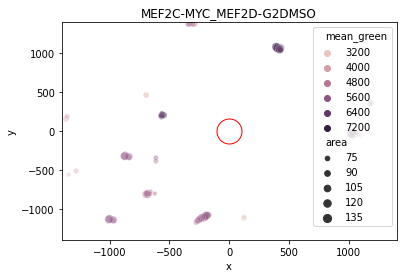

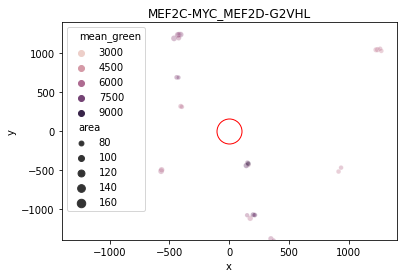

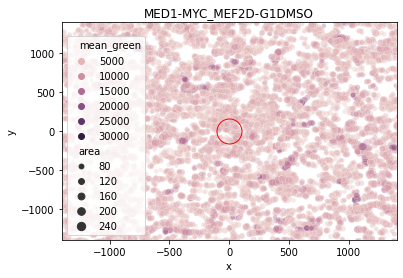

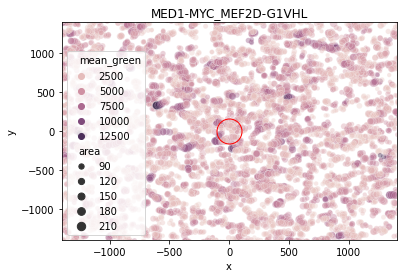

In [377]:
fish.drawDots({i: twodists[i] for i in twodists.keys() if 'MEF2D-MEF2C' not in i}, scenter=25, size=1400, zsize=800, 
             folder=folder+'greenall_', sscale=[0.4]*len(twodists) , signal="mean_green",
             area="area")

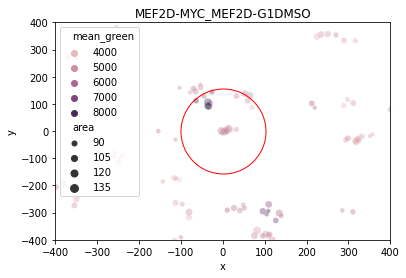

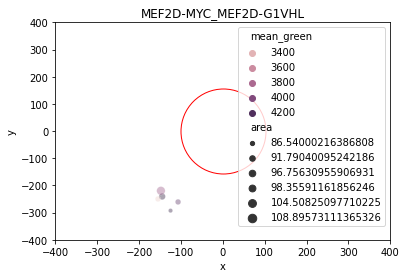

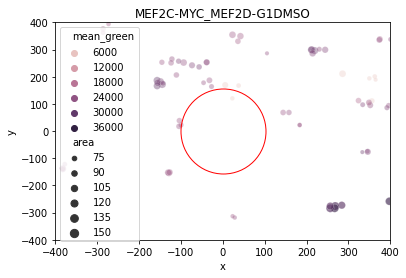

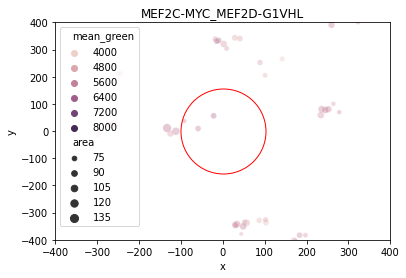

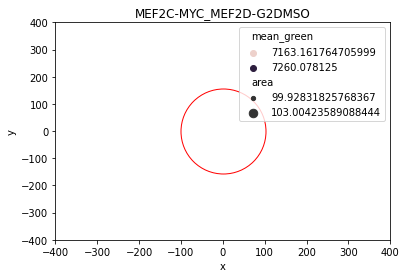

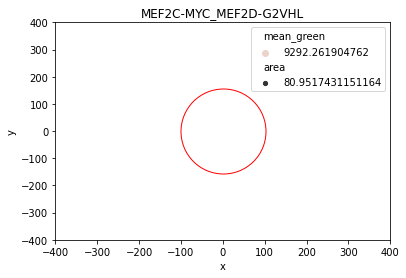

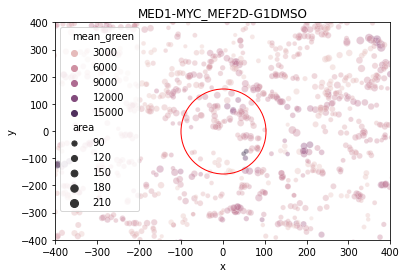

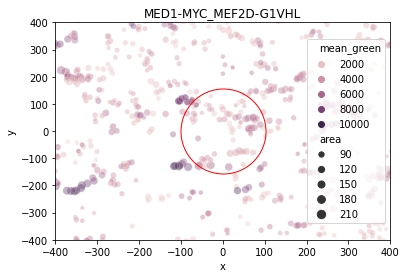

In [378]:
fish.drawDots({i: twodists[i] for i in twodists.keys() if 'MEF2D-MEF2C' not in i}, scenter=85, size=400, zsize=600,
             folder=folder+"coloconly_", sscale=[0.4]*len(twodists), signal="mean_green",
             area="area")

In [ ]:
twodists, _ = computeDistsFromClass(mred, ared, conds=['DMSO', 'VHL'], groupcol="group", sclass='red', signal="mean_red", area="area"):

In [ ]:
fish.drawDots(twodists, scenter=105, size=170, zsize=1000,
             folder=folder+"redonly_", sscale=[0.8,0.4], signal="signal",
             area="area")

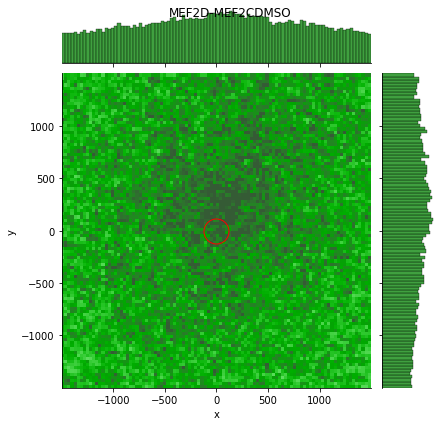

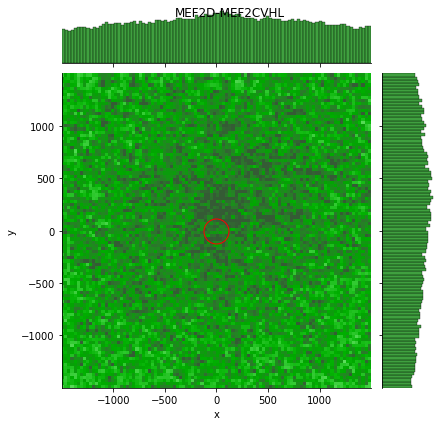

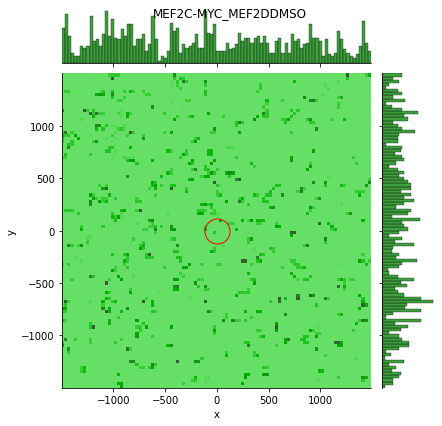

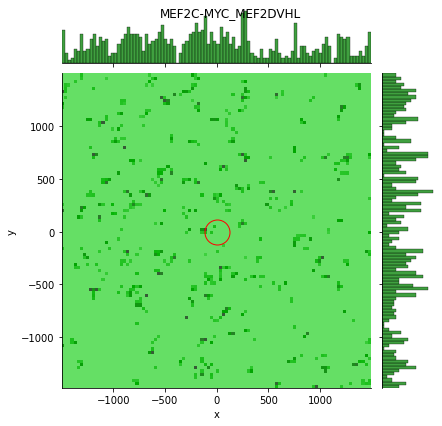

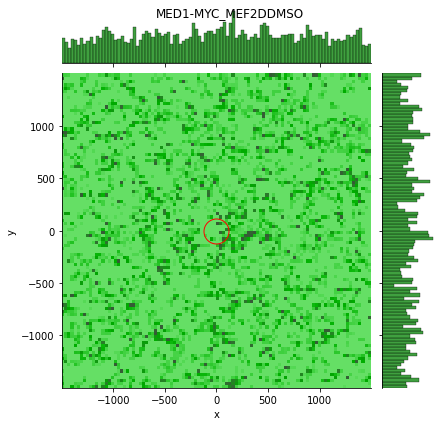

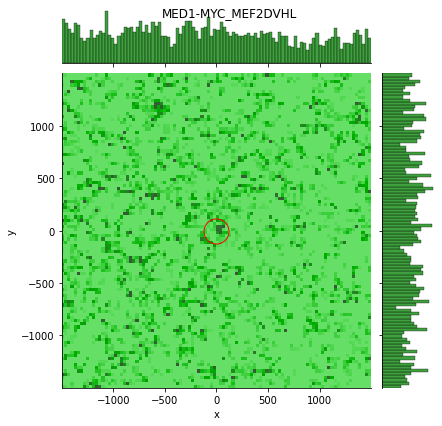

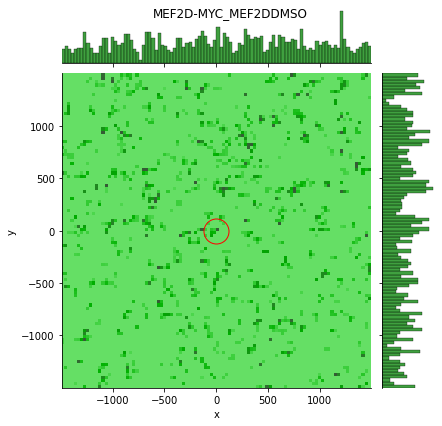

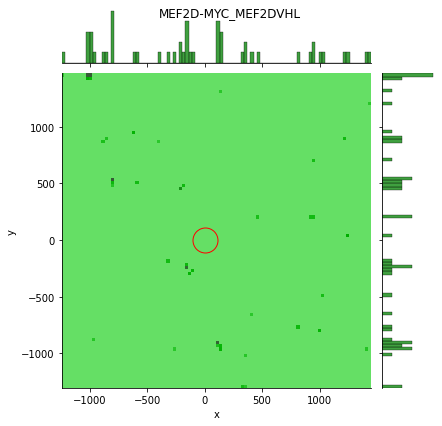

In [136]:
size=1500
bins=100
s = 25
for k, v in newdists.items():
    v = pd.DataFrame(data=v[:,:-1], columns=['x','y','z','sum_green',"area"]).astype(float)
    p = sns.jointplot(data=v[(abs(v.x)<size) & (abs(v.y)<size) & (abs(v.z)<size)], x="x", y="y",  kind="hist", weights=v[(abs(v.x)<size) & (abs(v.y)<size)& (abs(v.z)<size)].sum_green/100000, bins=bins, marginal_kws=dict(bins=bins), color="green", common_norm=True, pmax=.9, thresh=None)
    # gridsize=50, kind="hex", marginal_kws=dict(bins=50))
    # hue="sum_green_sum")
    x_values = [0]#, 2, 3, 4]
    y_values = [0]#, 0, 0, 0]
    p.ax_joint.plot(x_values, y_values, 'o', ms=s, markerfacecolor="None",
         markeredgecolor='red', markeredgewidth=1)
    p.fig.suptitle(k)
    plt.show()
    p.savefig(folder+k+'_2D_distances_from_red.pdf')

In [ ]:
# apply plot to old data from juliana    

In [ ]:
# make a nice fake plot
sns.plot()

In [194]:
mv $folder '../results/FishSuperResColoc/plots_v3_withfilter/'

## saving

In [200]:
! cd .. && git add . && git commit -m "adding whiskers" && git push

[master a1525e5] adding whiskers
 292 files changed, 324615 insertions(+), 10805 deletions(-)
 rewrite notebooks/Fish_SuperRes.ipynb (66%)
 create mode 100644 results/FishSuperResColoc/plots_v3_withfilter/MED1-MYC_MEF2DDMSO_1D_distances_from_red.pdf
 create mode 100644 results/FishSuperResColoc/plots_v3_withfilter/MED1-MYC_MEF2DDMSO_2D_distances_from_red.pdf
 create mode 100644 results/FishSuperResColoc/plots_v3_withfilter/MED1-MYC_MEF2DDMSO_scatter_representation_size_to_center.pdf
 create mode 100644 results/FishSuperResColoc/plots_v3_withfilter/MED1-MYC_MEF2DVHL_1D_distances_from_red.pdf
 create mode 100644 results/FishSuperResColoc/plots_v3_withfilter/MED1-MYC_MEF2DVHL_2D_distances_from_red.pdf
 create mode 100644 results/FishSuperResColoc/plots_v3_withfilter/MED1-MYC_MEF2DVHL_scatter_representation_size_to_center.pdf
 create mode 100644 results/FishSuperResColoc/plots_v3_withfilter/MED1-MYC_MEF2D_single_counts _on coloc.pdf
 create mode 100644 results/FishSuperResColoc/plots_v3_wi

Enumerating objects: 233, done.
Counting objects: 100% (233/233), done.
Delta compression using up to 8 threads
Compressing objects: 100% (227/227), done.
Writing objects: 100% (227/227), 39.30 MiB | 4.56 MiB/s, done.
Total 227 (delta 196), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (196/196), completed with 4 local objects.
remote: warning: GH001: Large files detected. You may want to try Git Large File Storage - https://git-lfs.github.com.
remote: warning: See http://git.io/iEPt8g for more information.
remote: warning: File results/FishSuperResColoc/v3_annotated_green.csv is 85.88 MB; this is larger than GitHub's recommended maximum file size of 50.00 MB
remote: warning: File results/FishSuperResColoc/v3_all.csv is 99.44 MB; this is larger than GitHub's recommended maximum file size of 50.00 MB
remote: 
remote: GitHub found 1 vulnerability on jkobject/AMLproject's default branch (1 moderate). To find out more, visit:
remote:      https://github.com/jkobject/AMLp